# Begin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold,cross_validate

In [76]:
df1 = pd.read_csv('Cd.csv')
df2 = pd.read_csv('As.csv')
df3 = pd.read_csv('Pb.csv')

x1 = df1.iloc[:,:19]
y1 = df1.iloc[:,19]

x2 = df2.iloc[:,:19]
y2 = df2.iloc[:,19]

x3 = df3.iloc[:,:19]
y3 = df3.iloc[:,19]

# 3D shap

In [2]:
df1 = pd.read_csv('Cdfill.csv')
df2 = pd.read_csv('Asfill.csv')
df3 = pd.read_csv('Pbfill.csv')

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
import shap

In [4]:
# 加载数据
df1 = pd.read_csv('Cdfill.csv')

# 选择特征和目标变量
x1 = df1.iloc[:, :19]
y1 = df1.iloc[:, 19]

# 分割数据
random_state = 100
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)

# 训练模型
mlp = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1500, activation='relu')
mlp.fit(X_train, y_train.ravel())

# 计算SHAP值
explainer = shap.Explainer(mlp.predict, X_train) 
shap_values = explainer(X_train)

Permutation explainer: 199it [00:18,  5.96it/s]                         


In [ ]:
relevance_plot(shap_values, feature_train, feature_name1, feature_name2)

In [10]:
def relevance_plot(train_shap_values, feature_train, feature_name1, feature_name2):
    feature_values1 = feature_train[str(feature_name1)].values
    feature_values2 = feature_train[str(feature_name2)].values
    abs_num = int(feature_train.columns.get_loc(str(feature_name1)))
    ord_num = int(feature_train.columns.get_loc(str(feature_name2)))

    shap_values = train_shap_values[:, abs_num] + train_shap_values[:, ord_num]
    bottom = shap_values.min() - 1
    top = shap_values.max() + 1

    # plt.scatter(abs_values, ord_values, s=40, c=shap_values, cmap='bwr')
    # plt.scatter(abs_values, ord_values)

    c = shap_values
    fig = plt.figure(dpi=600, figsize=(6, 6))
    # plt.rcParams['font.size'] = 10
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    ax1 = plt.axes(projection='3d')
    ax1.set_zlim(-25, 25)
    im = ax1.scatter3D(feature_values1, feature_values2, shap_values, c=c, cmap='jet')
    ax1.scatter3D(feature_values1, feature_values2, -25)
    ax1.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.6))
    ax1.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.6))
    ax1.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.6))
    # ax1.set_zlim(bottom, top)
    plt.grid(True)
    plt.grid(alpha=0.2)
    for number in range(len(shap_values)):
        xs = [feature_values1[number], feature_values1[number]]
        ys = [feature_values2[number], feature_values2[number]]
        zs = [shap_values[number], -25]
        plt.plot(xs, ys, zs, c='grey', linestyle='--', alpha=0.1, linewidth=0.8)
    plt.tick_params(labelsize=13, pad=0.1)
    plt.xlabel(str(feature_name1), fontsize=15)
    plt.ylabel(str(feature_name2), fontsize=15)
    plt.colorbar(im, fraction=0.1, shrink=0.6, pad=0.1)
    ax1.view_init(elev=20)
    # plt.title(str(abscissa) + " " + str(ordinate))
    plt.show()

Permutation explainer: 199it [00:14,  4.39it/s]                         


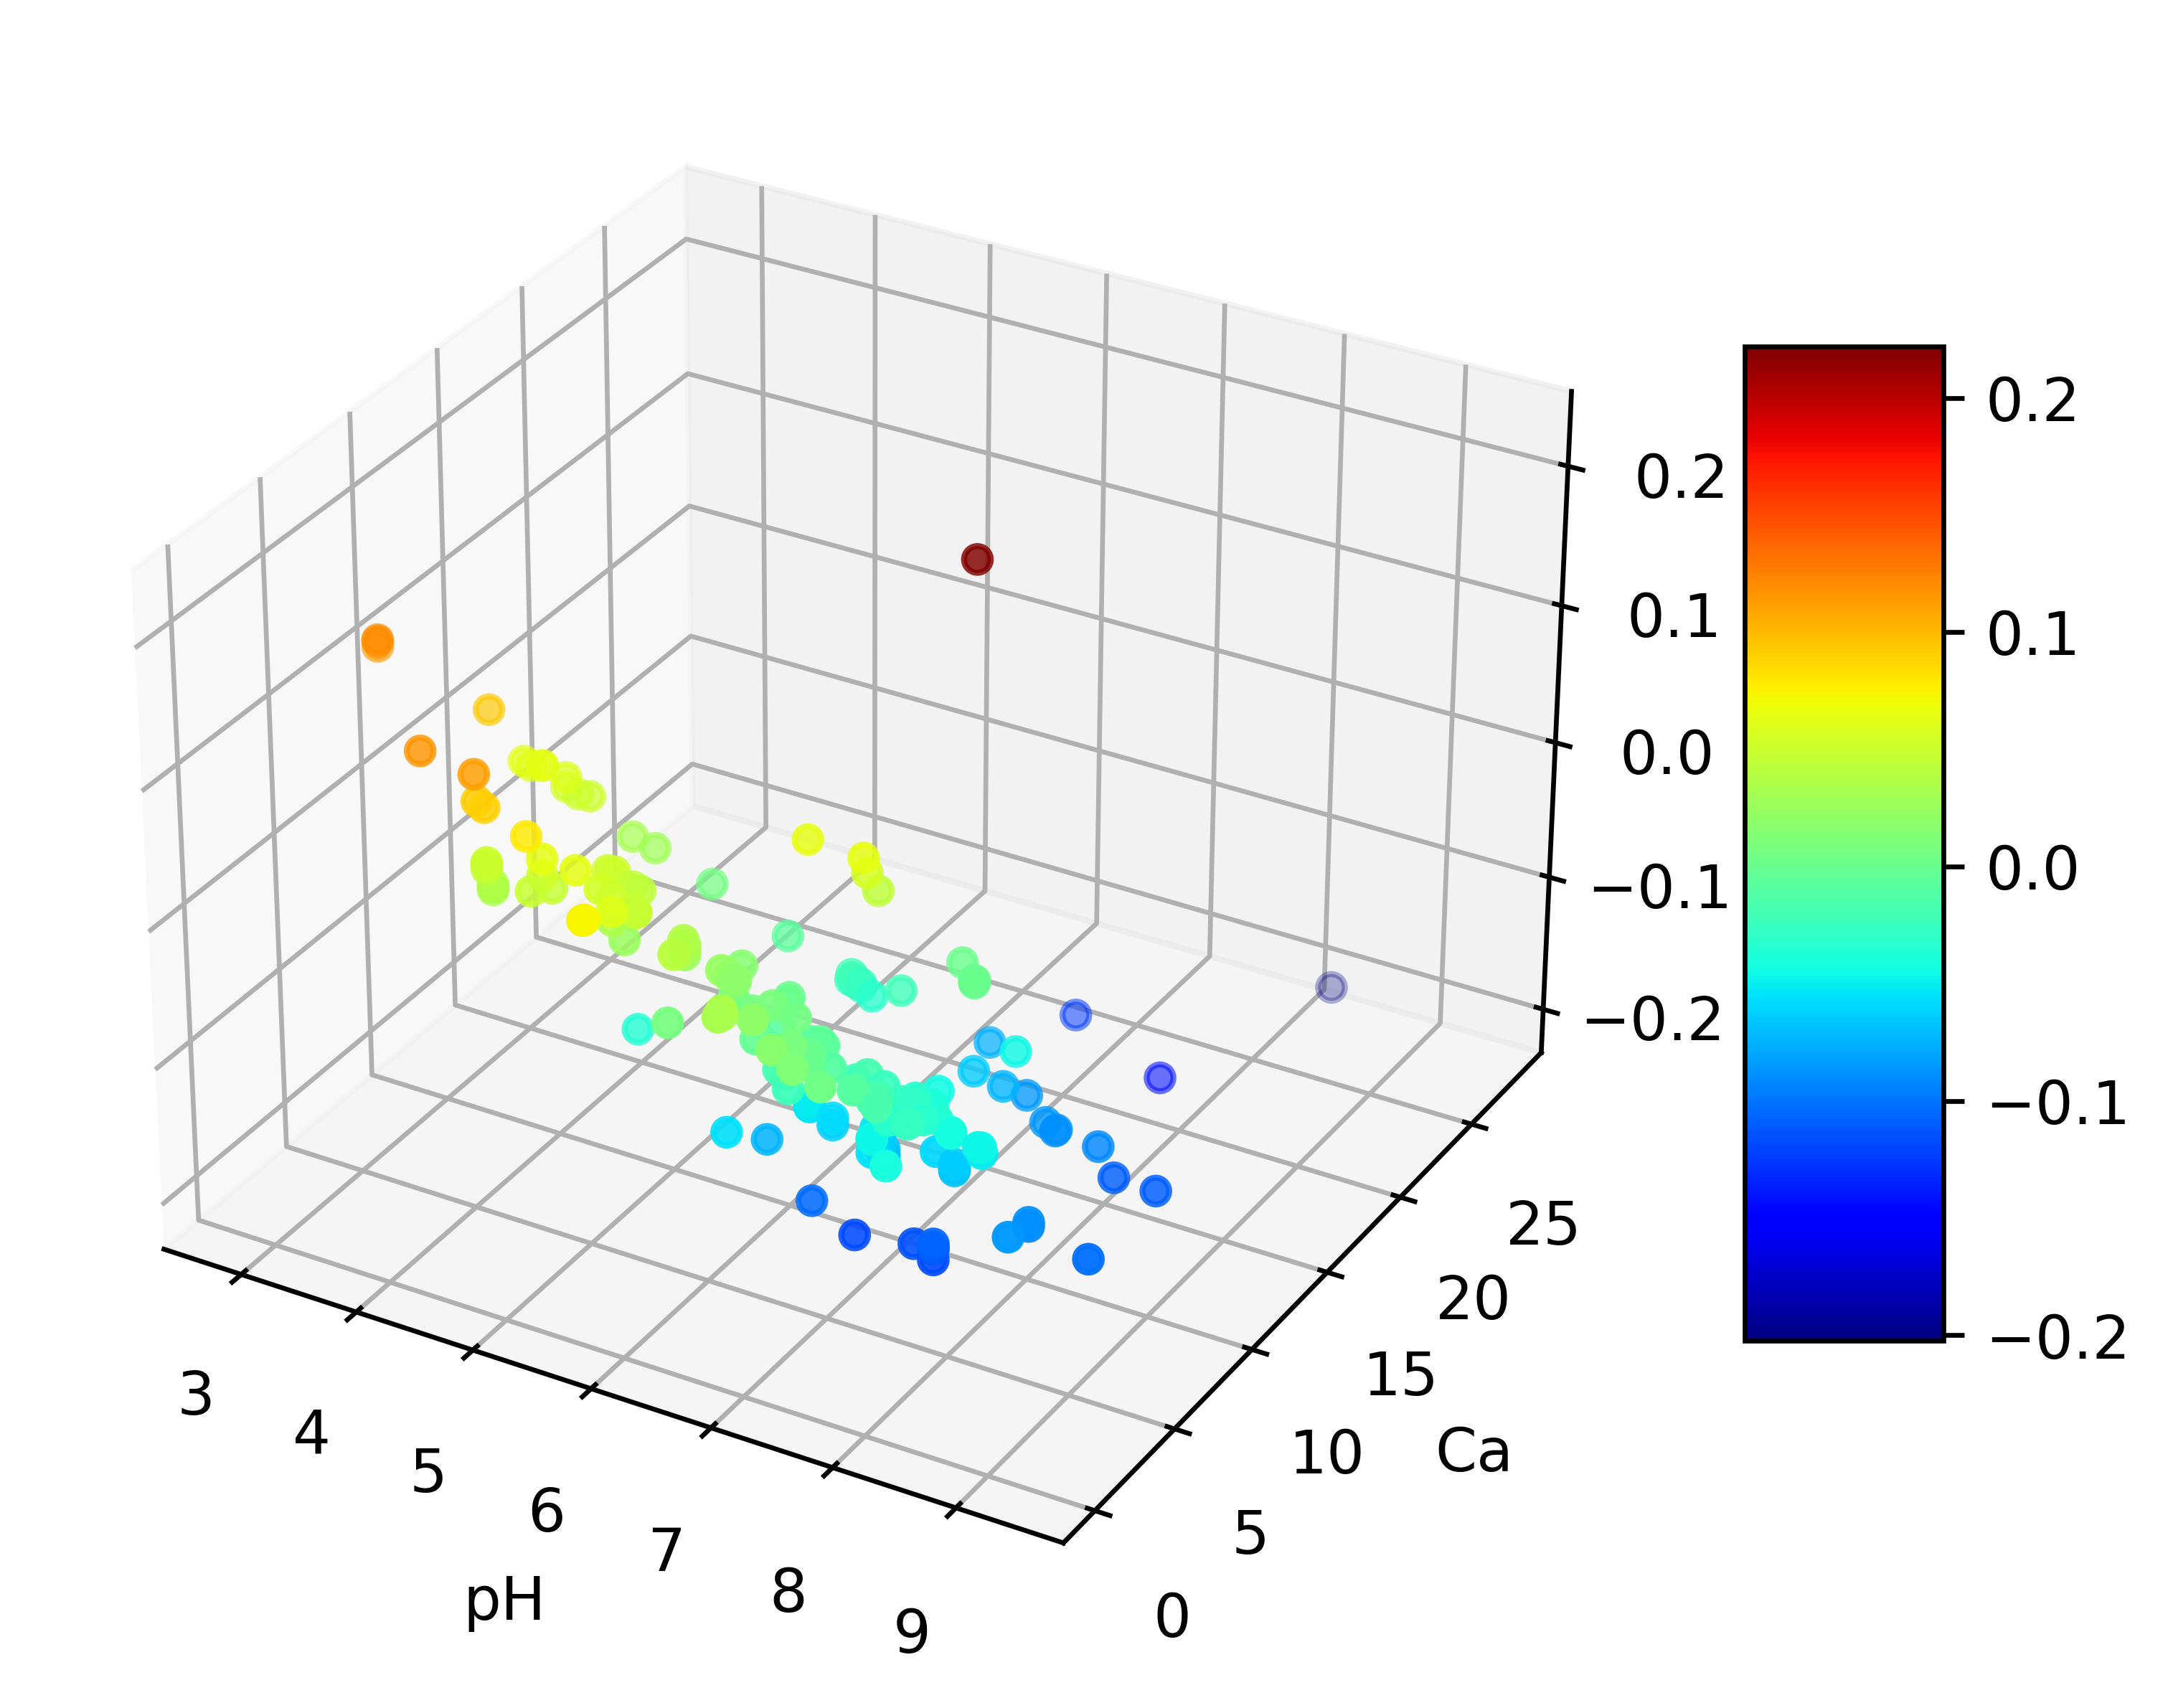

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import shap  # 用于计算SHAP值

# 加载数据
df1 = pd.read_csv('Cdfill.csv')

# 选择特征和目标变量
x1 = df1.iloc[:, :19]
y1 = df1.iloc[:, 19]

# 分割数据
random_state = 100
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)

# 训练模型
mlp = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1500, activation='relu')
mlp.fit(X_train, y_train.ravel())

# 创建一个SHAP解释器
explainer = shap.Explainer(mlp.predict, X_train)

# 计算SHAP值
shap_values = explainer(X_train)

# 函数：绘制基于SHAP值的3D图
def relevance_plot(feature_train, feature_name1, feature_name2, shap_values):
    # 获取特定特征的SHAP值
    shap_values_array = shap_values.values  # 将SHAP值转换为数组
    feature_values1 = feature_train[feature_name1].values
    feature_values2 = feature_train[feature_name2].values
    shap_values_feature1 = shap_values_array[:, feature_train.columns.get_loc(feature_name1)]
    shap_values_feature2 = shap_values_array[:, feature_train.columns.get_loc(feature_name2)]

    # 计算每个点的总SHAP值（这里我们简单地将两个特征的SHAP值相加）
    shap_sum = shap_values_feature1 + shap_values_feature2

    # 绘制3D图
    fig = plt.figure(dpi=600, figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    plot = ax.scatter(feature_values1, feature_values2, shap_sum, c=shap_sum, cmap='jet')
    ax.set_xlabel(feature_name1)
    ax.set_ylabel(feature_name2)
    ax.set_zlabel('SHAP value')
    fig.colorbar(plot, ax=ax, shrink=0.5, aspect=5)  # 添加颜色条
    plt.show()

# 调用绘图函数
relevance_plot(X_train, 'pH', 'Ca', shap_values)


Permutation explainer: 199it [00:19,  4.87it/s]                         


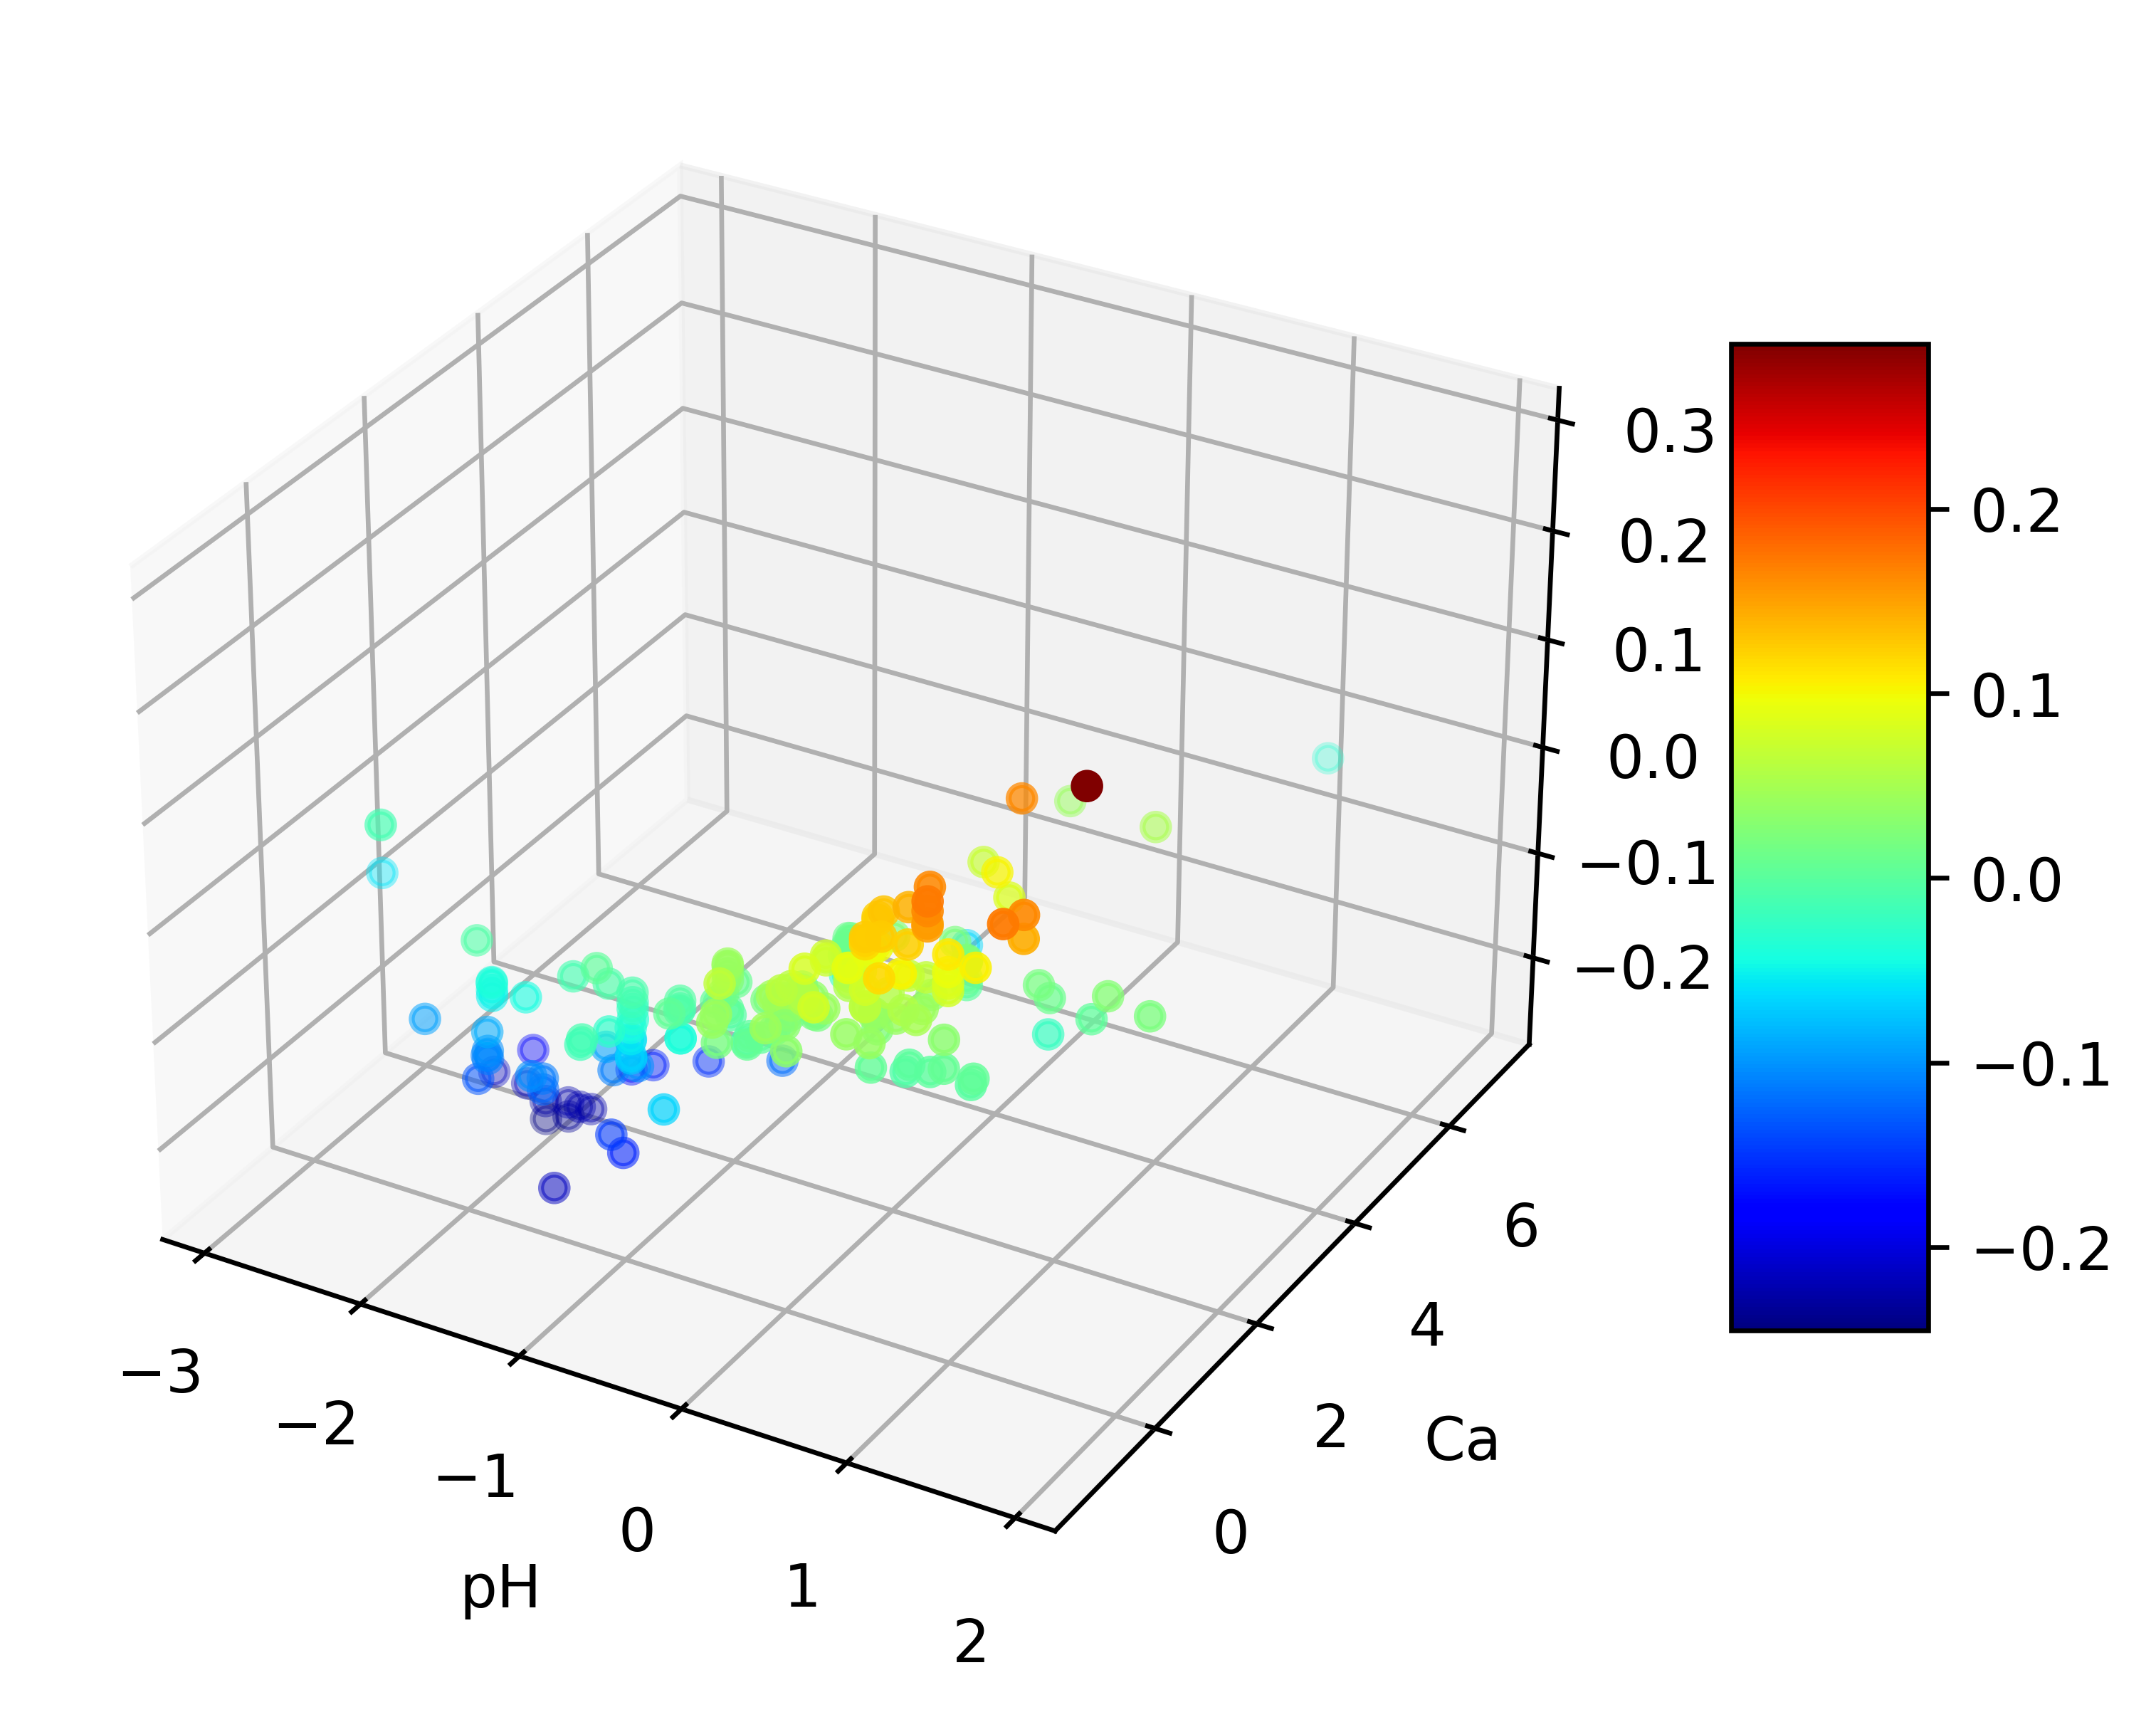

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # 用于数据标准化
import shap  # 用于计算SHAP值

# 加载数据
df1 = pd.read_csv('Cdfill.csv')

# 选择特征和目标变量
x1 = df1.iloc[:, :19]
y1 = df1.iloc[:, 19]

# 分割数据
random_state = 100
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意：我们只在训练集上fit，然后transform测试集

# 训练模型
mlp = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1500, activation='relu')
mlp.fit(X_train_scaled, y_train.ravel())

# 创建一个SHAP解释器
explainer = shap.Explainer(mlp.predict, X_train_scaled)

# 计算SHAP值
shap_values = explainer(X_train_scaled)

# 函数：绘制基于SHAP值的3D图
def relevance_plot(feature_train_df, feature_train_scaled, feature_name1, feature_name2, shap_values):
    # 获取特定特征的SHAP值
    shap_values_array = shap_values.values  # 将SHAP值转换为数组
    feature_idx1 = feature_train_df.columns.get_loc(feature_name1)
    feature_idx2 = feature_train_df.columns.get_loc(feature_name2)

    feature_values1 = feature_train_scaled[:, feature_idx1]
    feature_values2 = feature_train_scaled[:, feature_idx2]
    shap_values_feature1 = shap_values_array[:, feature_idx1]
    shap_values_feature2 = shap_values_array[:, feature_idx2]

    # 计算每个点的总SHAP值（这里我们简单地将两个特征的SHAP值相加）
    shap_sum = shap_values_feature1 + shap_values_feature2

    # 绘制3D图
    fig = plt.figure(dpi=600, figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    plot = ax.scatter(feature_values1, feature_values2, shap_sum, c=shap_sum, cmap='jet')
    ax.set_xlabel(feature_name1)
    ax.set_ylabel(feature_name2)
    ax.set_zlabel('SHAP value')
    fig.colorbar(plot, ax=ax, shrink=0.5, aspect=5)  # 添加颜色条
    plt.show()

# 调用绘图函数，注意我们传入的是原始DataFrame和标准化后的数据
relevance_plot(X_train, X_train_scaled, 'pH', 'Ca', shap_values)


Permutation explainer: 199it [00:18,  4.95it/s]                         


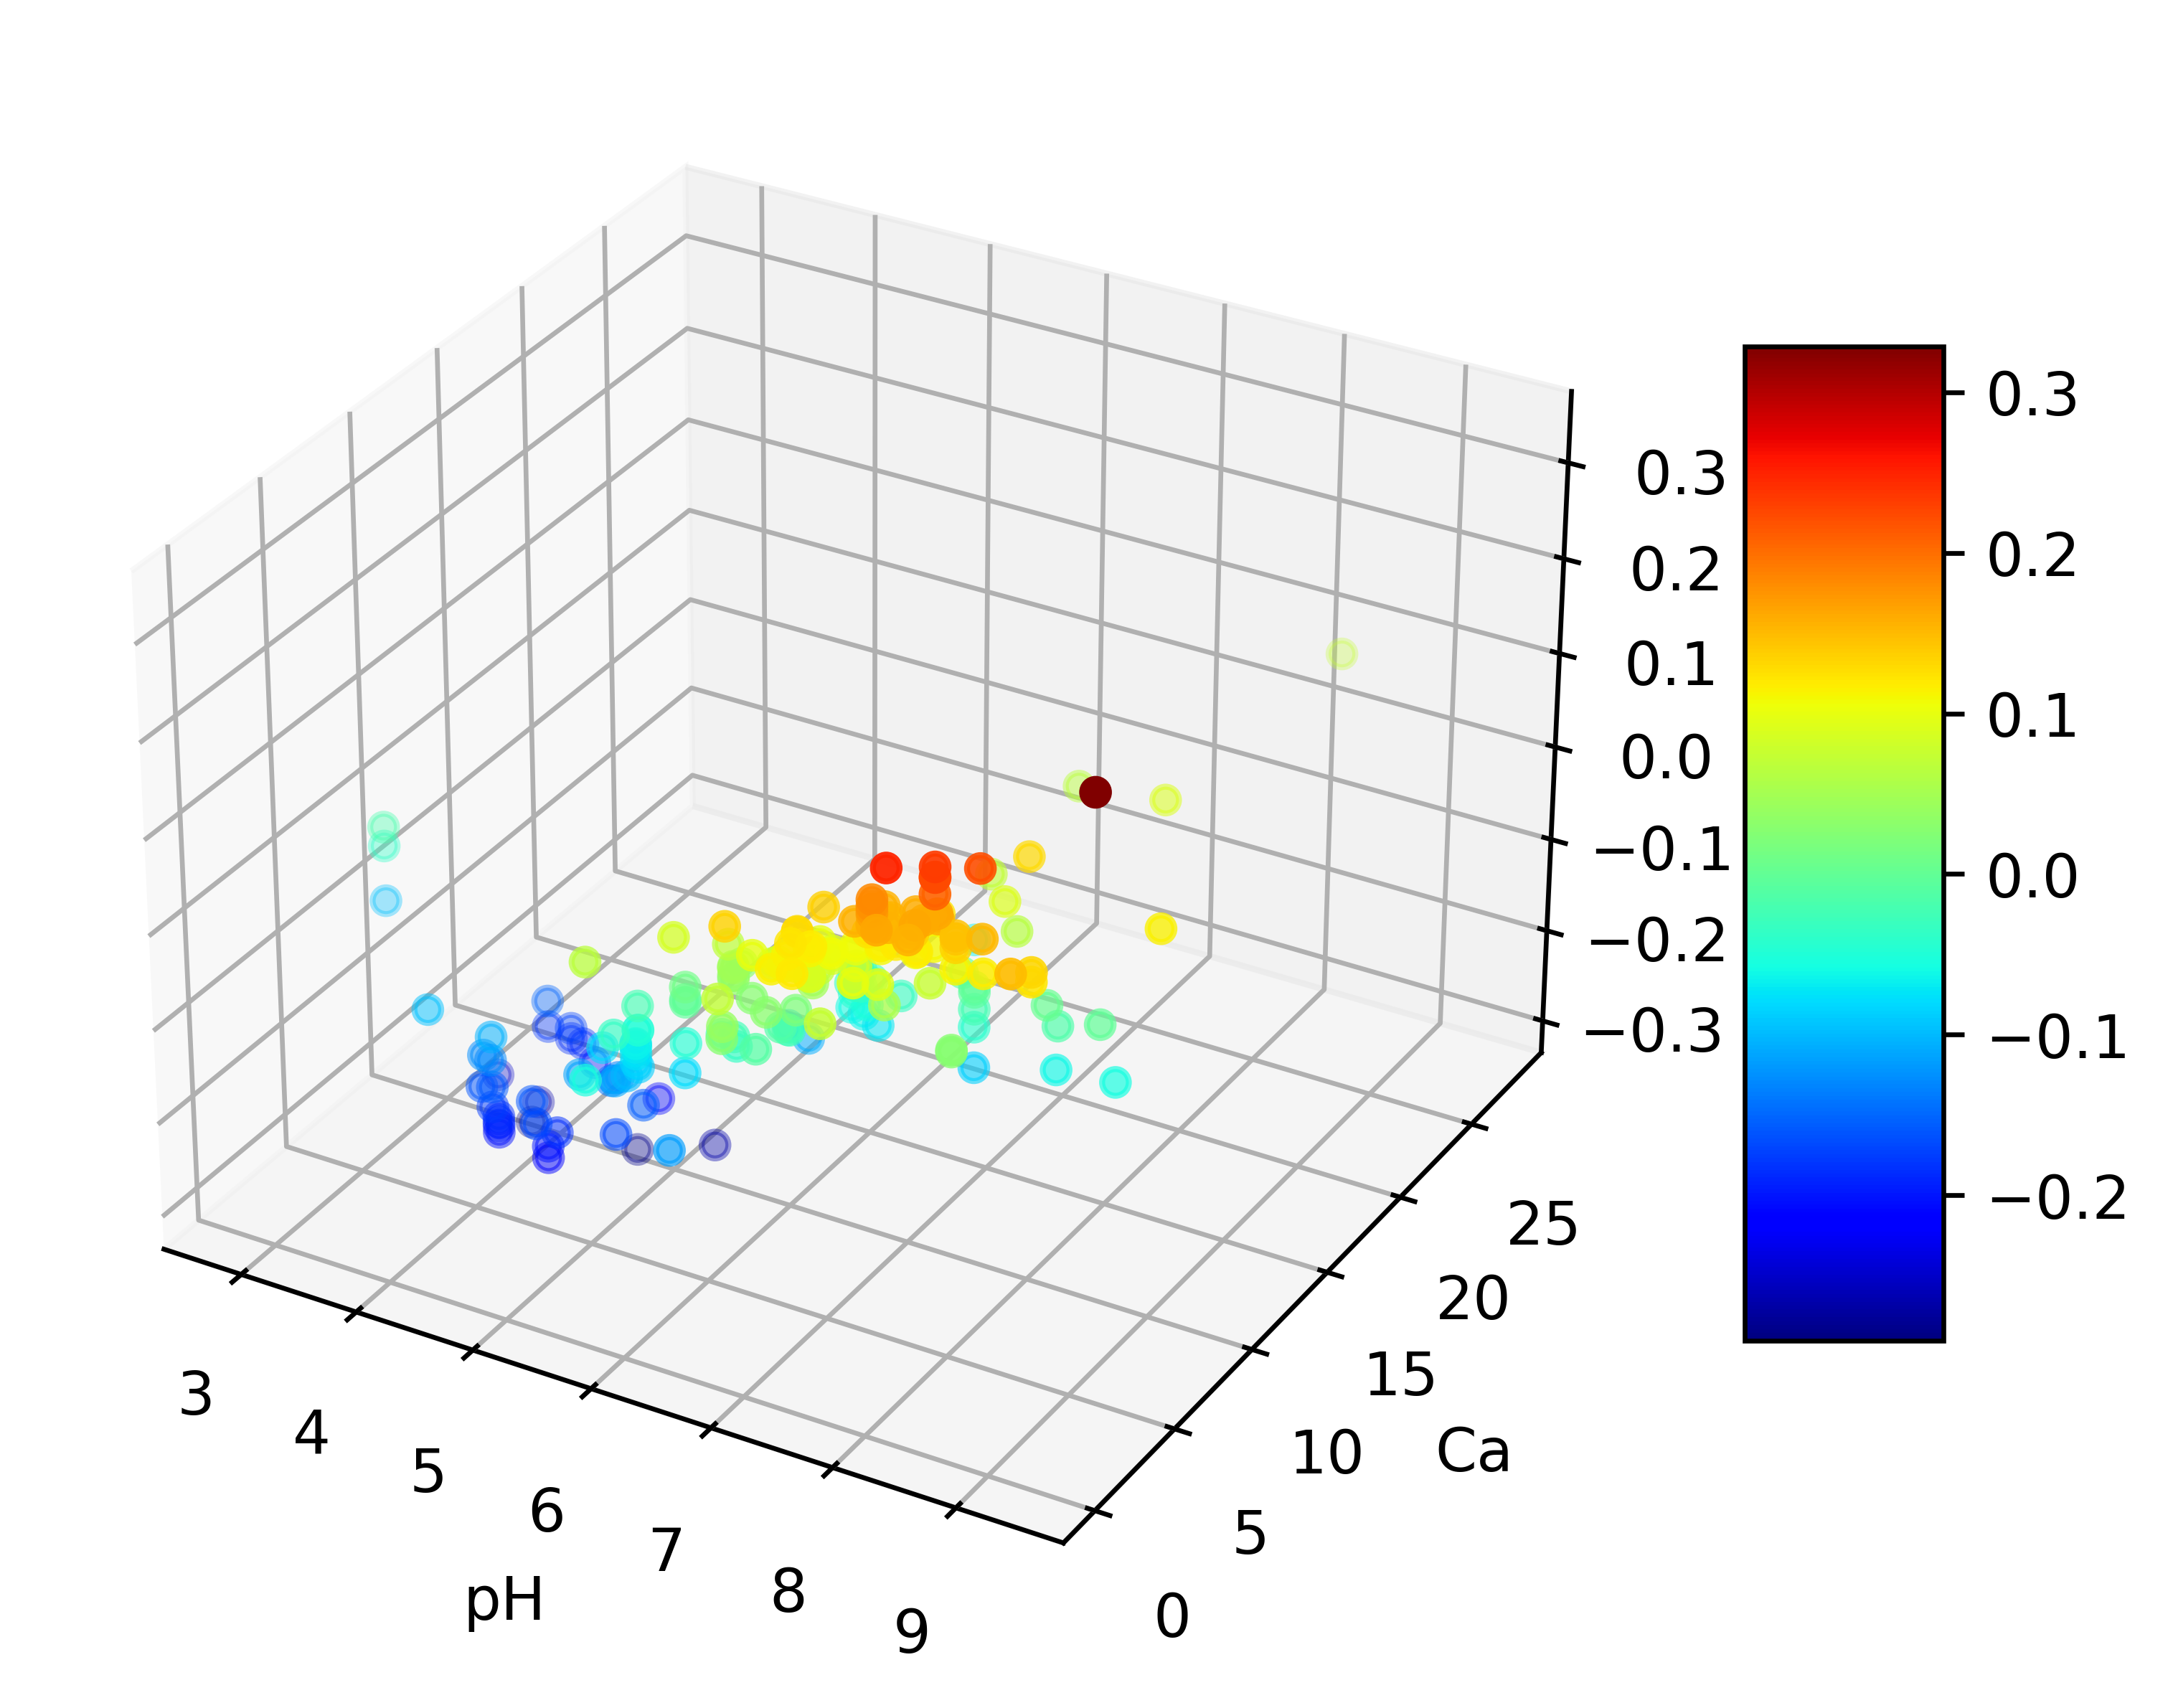

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # 用于数据标准化
import shap  # 用于计算SHAP值

# 加载数据
df1 = pd.read_csv('Cdfill.csv')

# 选择特征和目标变量
x1 = df1.iloc[:, :19]
y1 = df1.iloc[:, 19]

# 分割数据
random_state = 100
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意：我们只在训练集上fit，然后transform测试集

# 训练模型
mlp = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1500, activation='relu')
mlp.fit(X_train_scaled, y_train.ravel())

# 创建一个SHAP解释器
explainer = shap.Explainer(mlp.predict, X_train_scaled)

# 计算SHAP值
shap_values = explainer(X_train_scaled)

# 函数：反标准化数据
def inverse_scale(scaler, data_scaled, feature_idx):
    # 获取特定特征的均值和标准差
    mean = scaler.mean_[feature_idx]
    scale = scaler.scale_[feature_idx]

    # 反标准化
    data_unscaled = data_scaled * scale + mean
    return data_unscaled

# 函数：绘制基于SHAP值的3D图（修改版）
def relevance_plot(scaler, feature_train_df, feature_train_scaled, feature_name1, feature_name2, shap_values):
    # 获取特定特征的SHAP值
    shap_values_array = shap_values.values  # 将SHAP值转换为数组
    feature_idx1 = feature_train_df.columns.get_loc(feature_name1)
    feature_idx2 = feature_train_df.columns.get_loc(feature_name2)

    # 反标准化特征值
    feature_values1_unscaled = inverse_scale(scaler, feature_train_scaled[:, feature_idx1], feature_idx1)
    feature_values2_unscaled = inverse_scale(scaler, feature_train_scaled[:, feature_idx2], feature_idx2)

    shap_values_feature1 = shap_values_array[:, feature_idx1]
    shap_values_feature2 = shap_values_array[:, feature_idx2]

    # 计算每个点的总SHAP值（这里我们简单地将两个特征的SHAP值相加）
    shap_sum = shap_values_feature1 + shap_values_feature2

    # 绘制3D图
    fig = plt.figure(dpi=600, figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    plot = ax.scatter(feature_values1_unscaled, feature_values2_unscaled, shap_sum, c=shap_sum, cmap='jet')
    ax.set_xlabel(feature_name1)
    ax.set_ylabel(feature_name2)
    ax.set_zlabel('SHAP value')
    fig.colorbar(plot, ax=ax, shrink=0.5, aspect=5)  # 添加颜色条
    plt.show()

# 调用绘图函数，注意我们传入的是原始DataFrame和标准化后的数据，以及scaler对象
relevance_plot(scaler, X_train, X_train_scaled, 'pH', 'Ca', shap_values)


In [7]:
feature_indices

[11, 3, 12]

IndexError: tuple index out of range

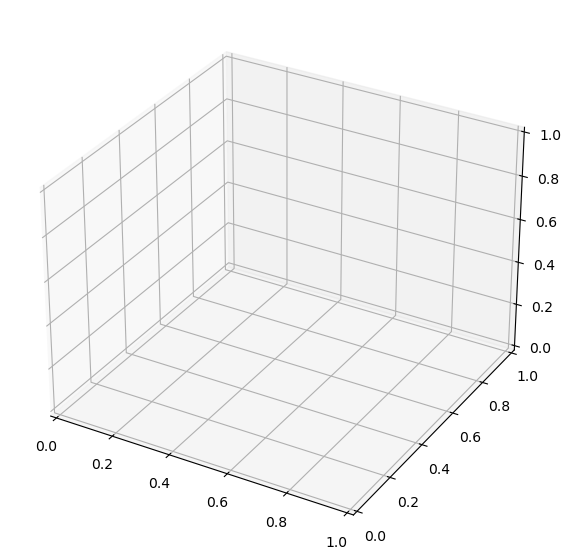

In [5]:
# 确定您想要可视化的特征名称
feature_names = ["Ca", "pH", "T"]  # 请确保这些特征在您的数据集中确实存在

# 找到这些特征在数据集中的索引
feature_indices = [list(X_train.columns).index(feature) for feature in feature_names]

# 获取特定特征的SHAP值
shap_feature_values = [shap_values[:, i] for i in feature_indices]

# 准备3D图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个点，颜色映射基于第三个特征的SHAP值
img = ax.scatter(shap_feature_values[0], shap_feature_values[1], shap_feature_values[2], 
                 c=shap_feature_values[2], cmap=plt.hot(), s=100)
fig.colorbar(img)  # 添加颜色条

# 设置坐标轴的标签
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel('SHAP value - ' + feature_names[2])

# 显示图形
plt.show()

# Normalize

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x1.iloc[:, 0] = scaler.fit_transform(x1.iloc[:, 0].values.reshape(-1, 1)).flatten()
x2.iloc[:, 0] = scaler.fit_transform(x2.iloc[:, 0].values.reshape(-1, 1)).flatten()
x3.iloc[:, 0] = scaler.fit_transform(x3.iloc[:, 0].values.reshape(-1, 1)).flatten()

In [78]:
y1_log= y1.apply(np.log10)
y2_log= y2.apply(np.log10)
y3_log= y3.apply(np.log10)

In [33]:
from sklearn.impute import KNNImputer

# 使用 KNN 方法填充缺失值
imputer = KNNImputer(n_neighbors=5)
x1_fill = pd.DataFrame(imputer.fit_transform(x1), columns=x1.columns)

imputer = KNNImputer(n_neighbors=5)
x2_fill = pd.DataFrame(imputer.fit_transform(x2), columns=x2.columns)

imputer = KNNImputer(n_neighbors=5)
x3_fill = pd.DataFrame(imputer.fit_transform(x3), columns=x3.columns)

# Test

In [82]:
from sklearn.preprocessing import  StandardScaler
from sklearn.neural_network import MLPRegressor

In [109]:
# 初始化结果列表
results = []

# 数据标准化
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x1_scaled = x_scaler.fit_transform(x1_fill)
y1_scaled = y_scaler.fit_transform(y1.values.reshape(-1, 1))

for random_state in range(1, 101):
    # 数据分割
    X_train, X_test, y_train, y_test = train_test_split(x1_scaled, y1_scaled, test_size=0.2, random_state=random_state)
    
    # 定义并训练 MLP
    # mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, activation='relu', random_state=random_state)
    mlp = MLPRegressor(hidden_layer_sizes=(150,100, 50), max_iter=1500, activation='relu', random_state=random_state)
    mlp.fit(X_train, y_train.ravel())
    
    # 预测
    y_pred = mlp.predict(X_test)
    
    # 逆转标准化，以获得原始尺度上的预测和真实值
    y_test_original = y_scaler.inverse_transform(y_test)
    y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

Using 198 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/50 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

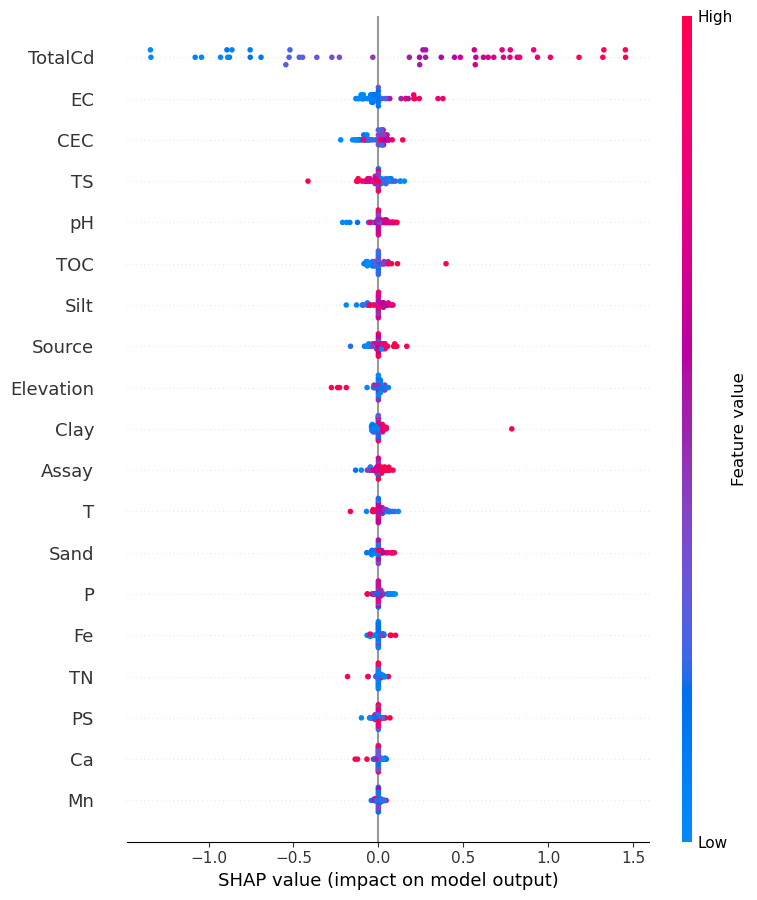

In [110]:
def predict_fn(X):
    return mlp.predict(X)
# 使用 KernelExplainer 计算 SHAP 值
explainer = shap.KernelExplainer(predict_fn, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)  # nsamples 参数决定了进行多少次随机重新排列以估计 SHAP 值
# 绘制 summary plot
shap.summary_plot(shap_values, X_test, feature_names=x1.columns)

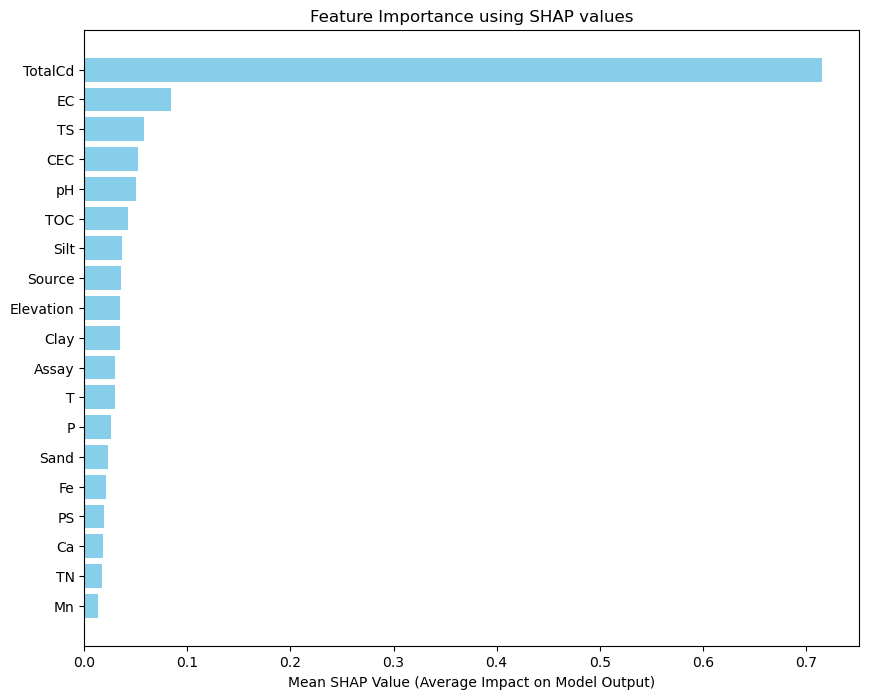

In [87]:
# 计算每个特征的平均 SHAP 值
mean_shap_values = np.abs(shap_values).mean(axis=0)

# 对 SHAP 值进行排序
sorted_indices = np.argsort(mean_shap_values)[::-1]
sorted_shap_values = mean_shap_values[sorted_indices]
sorted_feature_names = np.array(df1.columns[:-1])[sorted_indices]  # 假设 df2.columns[:-1] 是您的特征名

# 画柱状图
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_shap_values, color='skyblue')
plt.xlabel('Mean SHAP Value (Average Impact on Model Output)')
plt.title('Feature Importance using SHAP values')
plt.gca().invert_yaxis()  # 反转y轴，使得重要性从上到下降低
plt.show()

In [105]:
x1.columns

Index(['TotalCd', 'CEC', 'EC', 'pH', 'TOC', 'Clay', 'Silt', 'Sand', 'TN', 'Fe',
       'Mn', 'Ca', 'T', 'TS', 'P', 'PS', 'Elevation', 'Source', 'Assay'],
      dtype='object')

In [116]:
shap_values

array([[ 7.48607317e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.53505967e-03,  0.00000000e+00,
        -8.00052153e-02,  4.74441662e-02,  0.00000000e+00,
         0.00000000e+00,  3.06801664e-02,  2.41865858e-03,
         1.36522571e-02,  9.67569936e-02,  3.56193787e-02,
         0.00000000e+00,  0.00000000e+00,  1.09418798e-01,
         4.44212328e-02],
       [ 5.56963766e-01, -5.77692177e-02, -9.79489175e-02,
         0.00000000e+00,  3.17836981e-02,  3.98280376e-02,
         0.00000000e+00,  0.00000000e+00,  3.97438448e-02,
         2.37896835e-02,  2.56981533e-02,  1.99948488e-02,
         0.00000000e+00,  5.98697464e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.27102530e-02,
         4.80626046e-02],
       [-5.27531760e-01,  6.41182292e-02, -1.08131006e-01,
         7.93672989e-02, -2.00488633e-02, -4.14884816e-02,
        -3.31490916e-02, -3.93862423e-02,  2.52490805e-02,
         1.62598106e-02, -2.10774518e-02,  3.43109278e-02,
    

In [117]:
explainer = shap.Explainer(model)
shap_values = explainer(x1_fill)

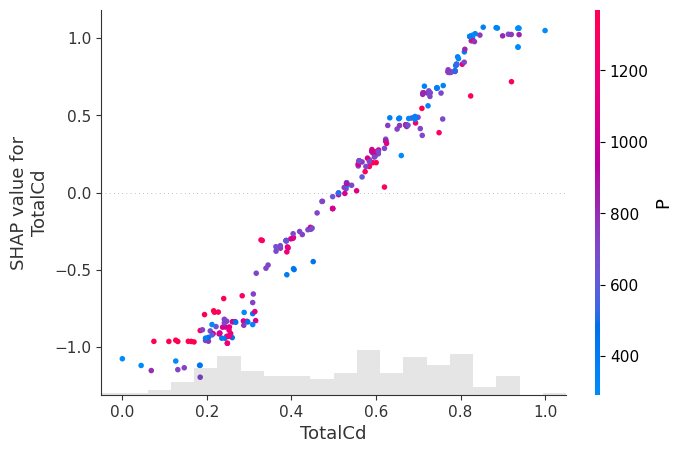

In [118]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "TotalCd"], color=shap_values)


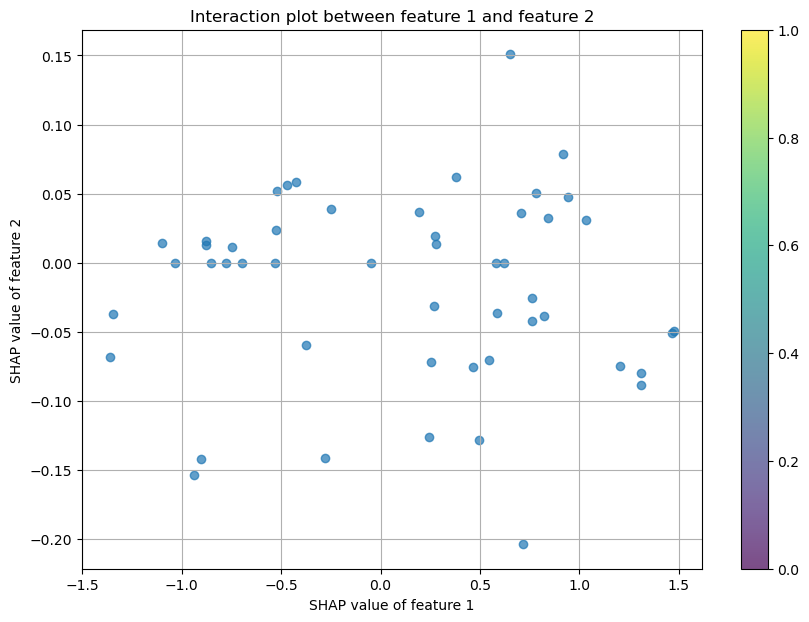

In [126]:
import matplotlib.pyplot as plt

# 提取第一个和第二个特征的SHAP值
shap_values_feature1 = shap_values[:, 0]
shap_values_feature2 = shap_values[:, 1]

# 使用matplotlib绘制散点图
plt.figure(figsize=(10, 7))
plt.scatter(shap_values_feature1, shap_values_feature2, alpha=0.7)
plt.colorbar()
plt.xlabel("SHAP value of feature 1")
plt.ylabel("SHAP value of feature 2")
plt.title("Interaction plot between feature 1 and feature 2")
plt.grid(True)
plt.show()


In [119]:
def predict_fn(X):
    return mlp.predict(X)

# 使用 KernelExplainer 计算 SHAP 值
explainer = shap.KernelExplainer(predict_fn, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)  # nsamples 参数决定了进行多少次随机重新排列以估计 SHAP 值

# 绘制特定特征的依赖图
# shap.dependence_plot("TotalCd", shap_values[0], X_test, interaction_index="P", feature_names=x1.columns)


# 获取 "TotalCd" 的列索引
ind = x1.columns.get_loc("TotalCd")

# 绘制 TotalCd 和 P 的依赖关系
shap.plots.scatter(shap_values[0][:, ind], color=shap_values[0], feature_names=x1.columns, interaction_index="P")


Using 198 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/50 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [96]:
# 假设你有以下数据: X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(x1_fill, y1, test_size=0.2, random_state=100)

predictions = mlp.predict(x1_fill)

X has feature names, but MLPRegressor was fitted without feature names


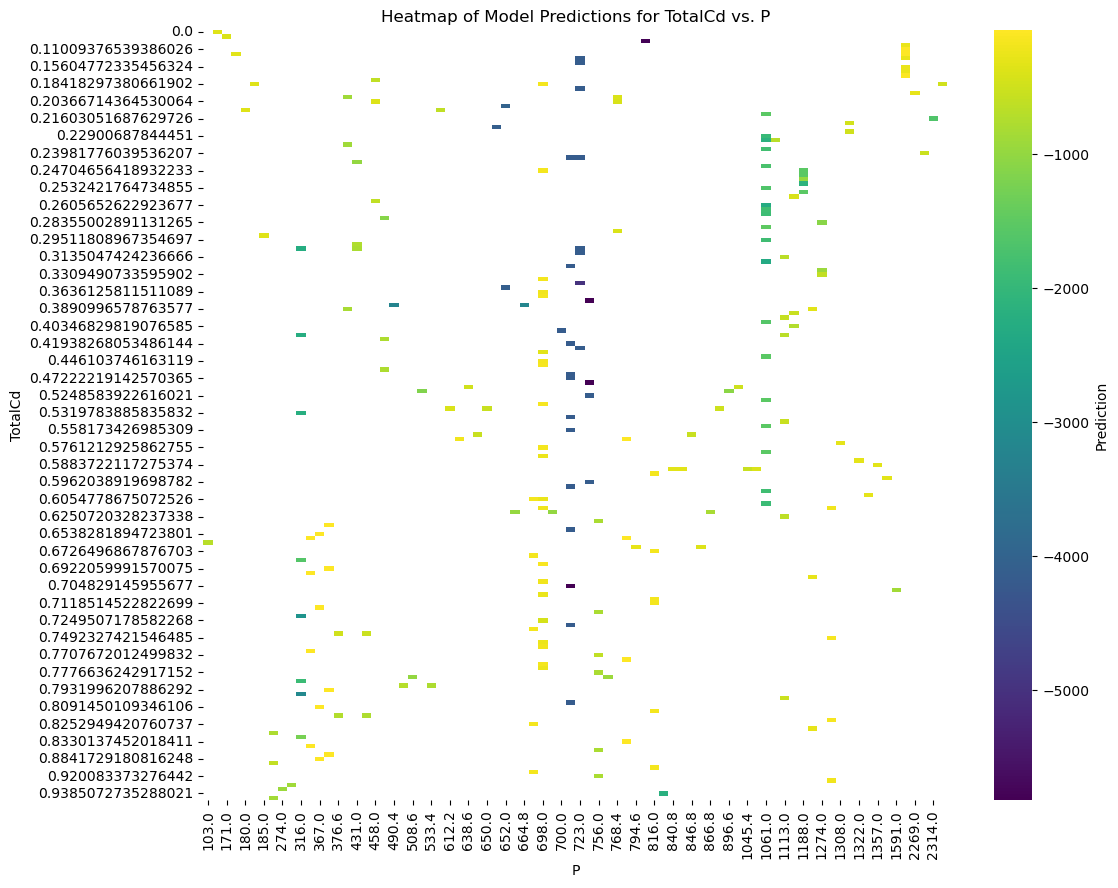

In [99]:
import seaborn as sns
def generate_heatmap(x1_fill, predictions):
    # Create a DataFrame with X_test and predictions
    df_test = x1_fill.copy()
    df_test['predictions'] = predictions
    
    # Create a pivot table for reshaping
    heatmap_data = df_test.pivot_table(index='TotalCd', columns='P', values='predictions', aggfunc=np.mean)

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Prediction'})
    plt.title("Heatmap of Model Predictions for TotalCd vs. P")
    plt.show()

# Generate the heatmap using the provided data
generate_heatmap(x1_fill, predictions)

# Shap residuals

In [64]:
import xgboost as xgb
import shap

# 假设你有以下数据: X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(x1_fill, y1, test_size=0.2, random_state=i)

# 1. 训练XGBoost模型
dtrain = xgb.DMatrix(X_train, label=y_train)
params = {"learning_rate": 0.01, "objective": "reg:squarederror"}
model = xgb.train(params, dtrain, 100)

# 2. 使用SHAP库计算Shapley值
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# 3. 计算梯度
dtest = xgb.DMatrix(X_test)
predictions = model.predict(dtest)
gradients = predictions - y_test

# 4. 使用梯度和Shapley值计算Shapley残差
shapley_residuals = gradients[:, np.newaxis] - shap_values

# 现在你可以查看、分析或可视化Shapley残差


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


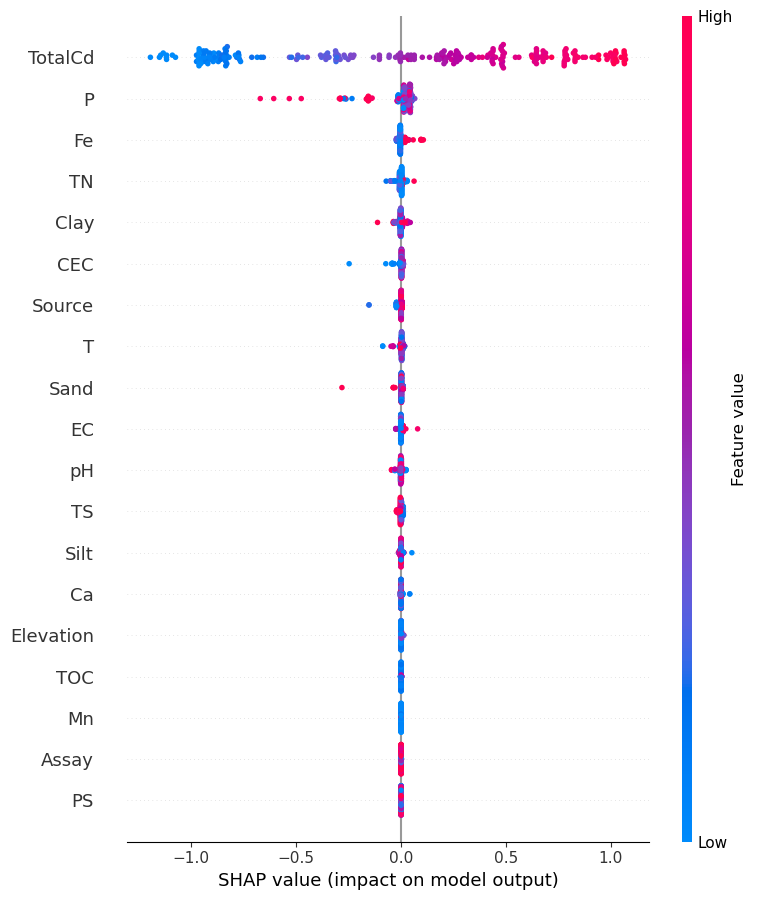

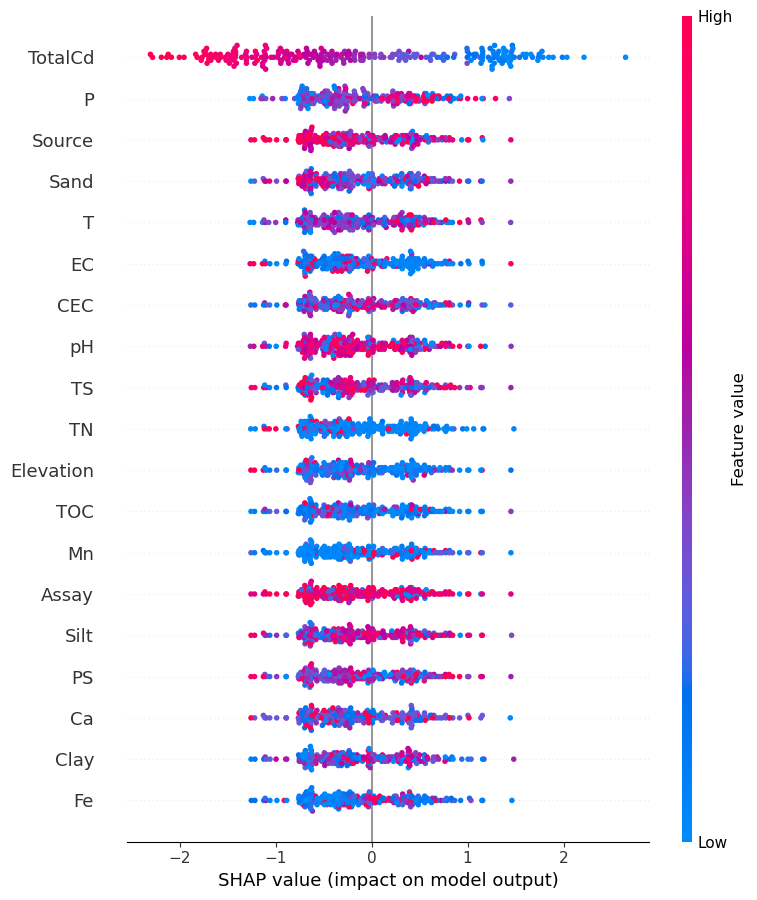

In [72]:
shap_values = explainer.shap_values(x1_fill)
# 3. 计算梯度
dtest = xgb.DMatrix(x1_fill)
predictions = model.predict(dtest)
gradients = predictions - y1

# 4. 使用梯度和Shapley值计算Shapley残差
shapley_residuals = gradients[:, np.newaxis] - shap_values


# 5. 可视化
# 使用SHAP库可视化Shapley值
shap.summary_plot(shap_values, x1_fill)

# 使用SHAP库可视化Shapley残差
shap.summary_plot(shapley_residuals, x1_fill)

plt.show()

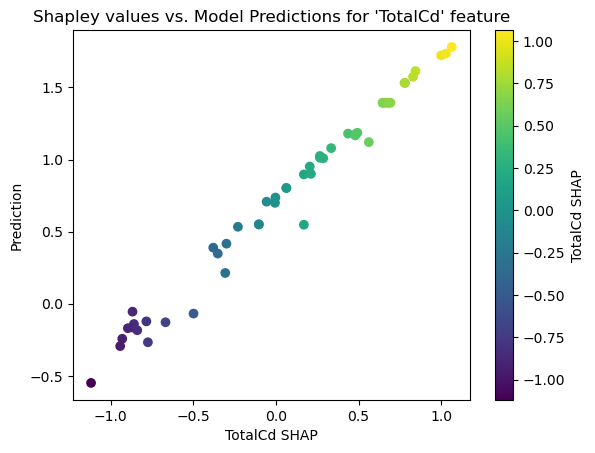

In [47]:
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# 假设你有以下数据: X_train, y_train, X_test

# 1. 训练XGBoost模型
dtrain = xgb.DMatrix(X_train, label=y_train)
params = {"learning_rate": 0.01, "objective": "reg:squarederror"}
model = xgb.train(params, dtrain, 100)

# 2. 使用SHAP库计算Shapley值
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# 3. 获取模型预测
dtest = xgb.DMatrix(X_test)
predictions = model.predict(dtest)

# 4. 绘制散点图
# 获取'Light'特征的Shapley值
light_shap_values = shap_values[:, X_test.columns.get_loc("TotalCd")]

# 创建一个色彩映射
cmap = plt.get_cmap('viridis')

# 使用scatter函数绘制散点图
sc = plt.scatter(light_shap_values, predictions, c=light_shap_values, cmap=cmap)

# 添加颜色条
plt.colorbar(sc, label="TotalCd SHAP")

# 添加标签和标题
plt.xlabel("TotalCd SHAP")
plt.ylabel("Prediction")
plt.title("Shapley values vs. Model Predictions for 'TotalCd' feature")

# 显示图形
plt.show()


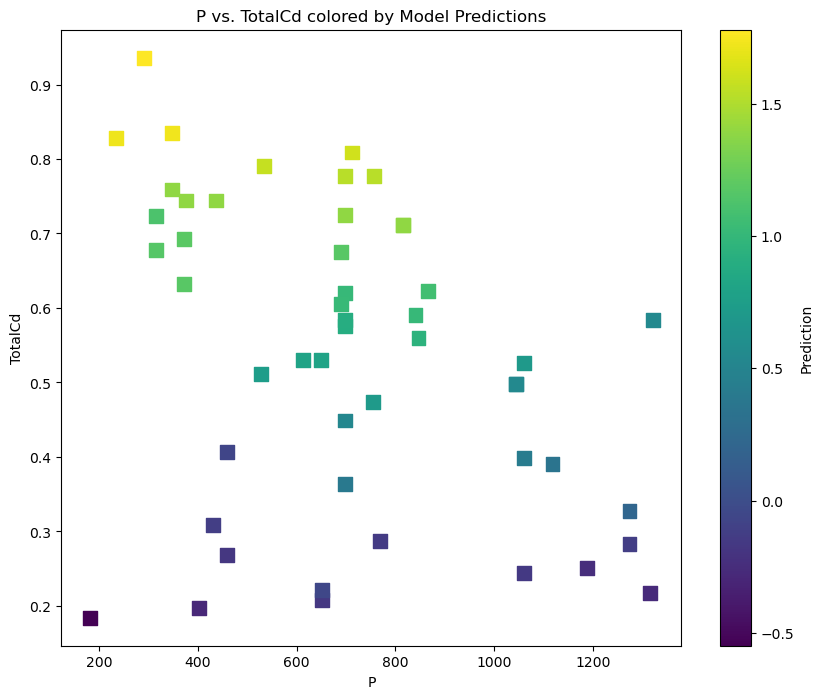

In [48]:
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# 假设你有以下数据: X_train, y_train, X_test

# 1. 训练XGBoost模型
dtrain = xgb.DMatrix(X_train, label=y_train)
params = {"learning_rate": 0.01, "objective": "reg:squarederror"}
model = xgb.train(params, dtrain, 100)

# 2. 使用SHAP库计算Shapley值
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# 3. 获取模型预测
dtest = xgb.DMatrix(X_test)
predictions = model.predict(dtest)

# 4. 绘制散点图
fig, ax = plt.subplots(figsize=(10, 8))

# 使用scatter函数绘制散点图
sc = ax.scatter(X_test['P'], X_test['TotalCd'], c=predictions, cmap='viridis', marker='s', s=100)

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Prediction')

# 添加标签和标题
ax.set_xlabel('P')
ax.set_ylabel('TotalCd')
ax.set_title("P vs. TotalCd colored by Model Predictions")

# 显示图形
plt.show()


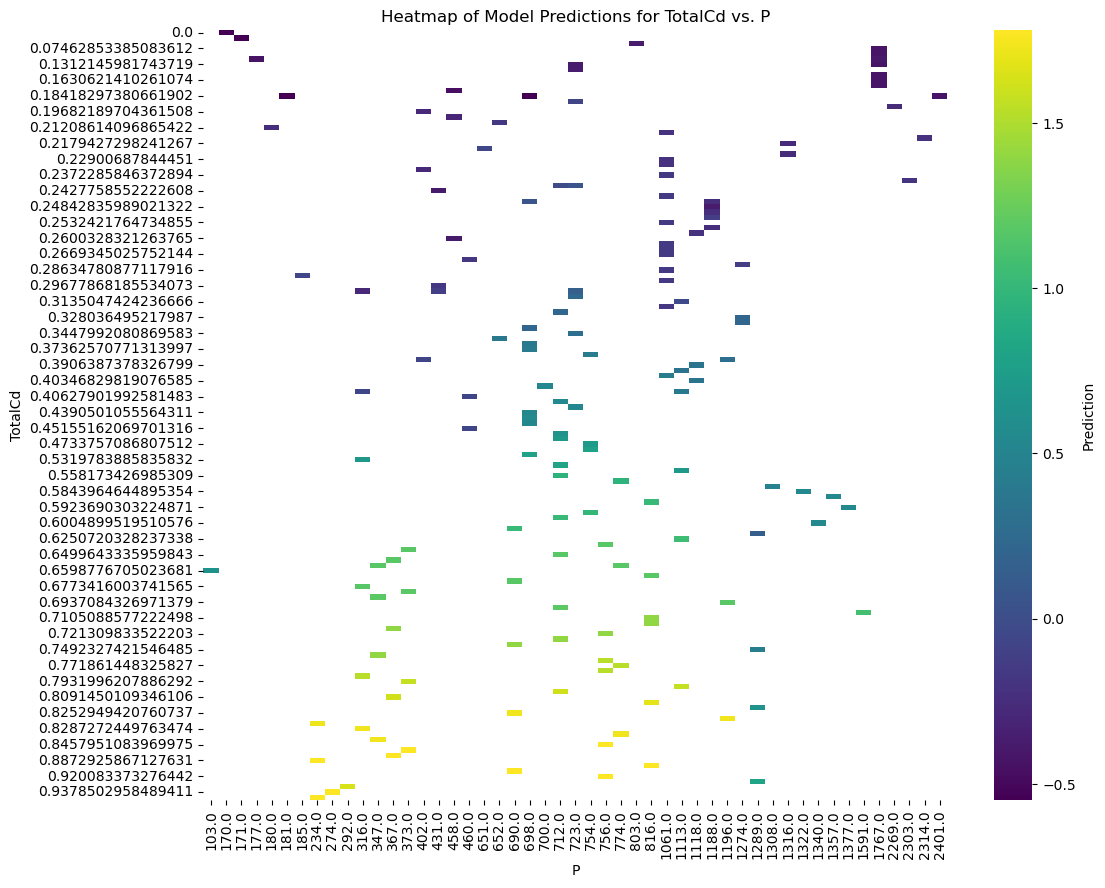

In [74]:
import seaborn as sns
def generate_heatmap(X_test, predictions):
    # Create a DataFrame with X_test and predictions
    df_test = X_test.copy()
    df_test['predictions'] = predictions
    
    # Create a pivot table for reshaping
    heatmap_data = df_test.pivot_table(index='TotalCd', columns='P', values='predictions', aggfunc=np.mean)

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Prediction'})
    plt.title("Heatmap of Model Predictions for TotalCd vs. P")
    plt.show()

# Generate the heatmap using the provided data
generate_heatmap(x1, predictions)

Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.


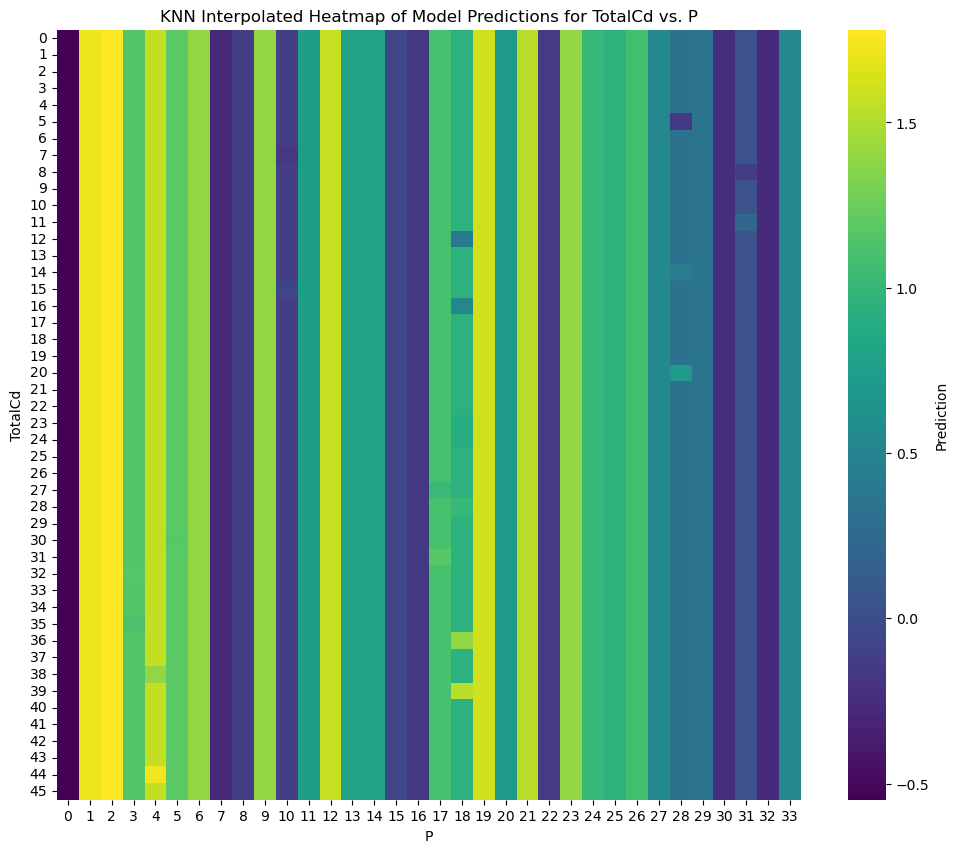

In [70]:
from sklearn.impute import KNNImputer

def generate_knn_interpolated_heatmap(X_test, predictions):
    # Create a DataFrame with X_test and predictions
    df_test = X_test.copy()
    df_test['predictions'] = predictions
    
    # Create a pivot table for reshaping
    heatmap_data = df_test.pivot_table(index='TotalCd', columns='P', values='predictions', aggfunc=np.mean)
    
    # Use KNNImputer for interpolation
    imputer = KNNImputer(n_neighbors=5)
    interpolated_data = imputer.fit_transform(heatmap_data)
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(interpolated_data, cmap='viridis', cbar_kws={'label': 'Prediction'})
    plt.xlabel('P')
    plt.ylabel('TotalCd')
    plt.title("KNN Interpolated Heatmap of Model Predictions for TotalCd vs. P")
    plt.show()

# You can run this function in your environment with your data and predictions
# Example usage: generate_knn_interpolated_heatmap(X_test, predictions)
generate_knn_interpolated_heatmap(X_test, predictions)

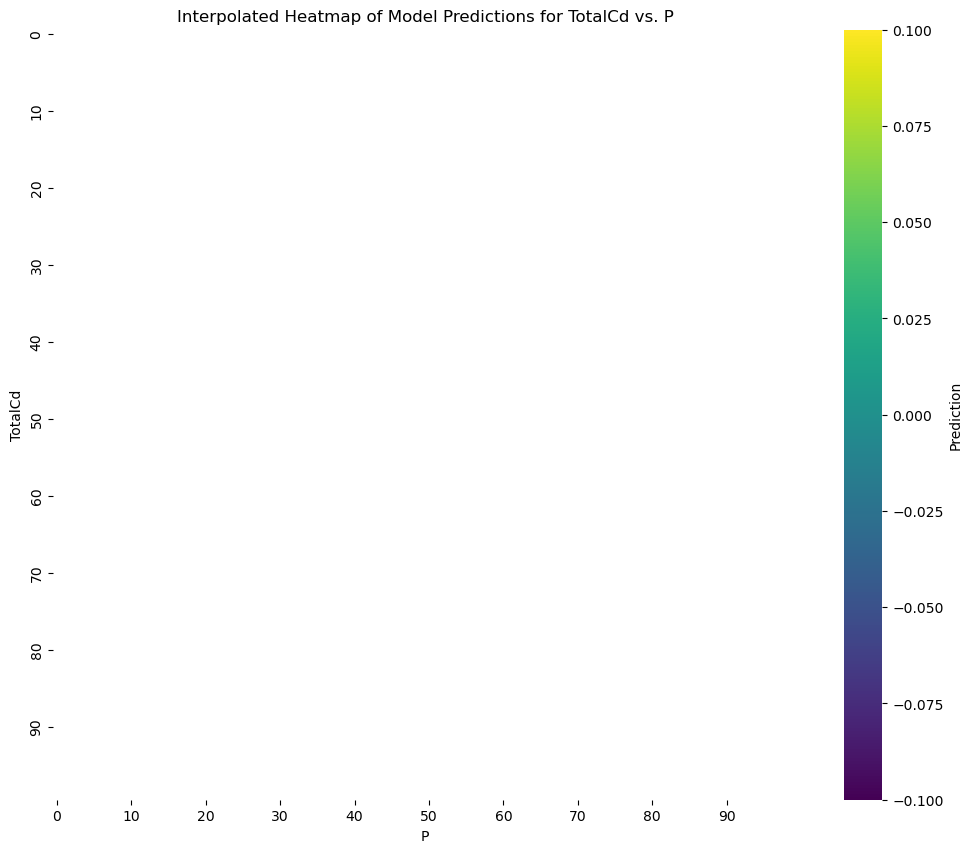

In [62]:
def generate_interpolated_heatmap_fixed(X_test, predictions):
    # Create a DataFrame with X_test and predictions
    df_test = X_test.copy()
    df_test['predictions'] = predictions
    
    # Create a pivot table for reshaping
    heatmap_data = df_test.pivot_table(index='TotalCd', columns='P', values='predictions', aggfunc=np.mean)
    
    # Use interp2d for 2D interpolation
    x = np.array(heatmap_data.columns)
    y = np.array(heatmap_data.index)
    z = heatmap_data.values
    f = interp2d(x, y, z, kind='linear')

    # Define the range for the interpolation
    x_new = np.linspace(X_test['P'].min(), X_test['P'].max(), 100)
    y_new = np.linspace(X_test['TotalCd'].min(), X_test['TotalCd'].max(), 100)
    z_new = f(x_new, y_new)
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(z_new, cmap='viridis', cbar_kws={'label': 'Prediction'}, 
                xticklabels=10, yticklabels=10)
    plt.xlabel('P')
    plt.ylabel('TotalCd')
    plt.title("Interpolated Heatmap of Model Predictions for TotalCd vs. P")
    plt.show()

# Generate the interpolated heatmap using the provided data
generate_interpolated_heatmap_fixed(X_test, predictions)


# Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import catboost as cb

In [38]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(10):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x1_fill, y1_log, test_size=0.2, random_state=i)

    # 定义基础模型
    ridge = Ridge()
    rf = RandomForestRegressor()
    xgb_model = xgb.XGBRegressor()
    cb_model = cb.CatBoostRegressor(verbose=False)

    # 训练基础模型
    ridge.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    cb_model.fit(X_train, y_train)

    # 生成基础模型的预测结果
    ridge_pred = ridge.predict(X_test)
    rf_pred = rf.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    cb_pred = cb_model.predict(X_test)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_test = np.column_stack((ridge_pred, rf_pred, xgb_pred, cb_pred))

    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor()

    # 设置L1和L2正则化强度
    l1_reg_strength = 0.5
 
    # 在损失函数中添加L1和L2正则化项
    boosting_model.set_params(alpha=l1_reg_strength)

    # 定义网格搜索参数
    # params = {
    #     'learning_rate': [0.05, 0.1, 0.15],
    #     'n_estimators': [50, 100, 150],
    #     'max_depth': [3, 5, 7],
    #     'subsample': [0.6, 0.8, 1],
    #     'alpha': [0, 0.1, 0.3, 1],
    #     'min_samples_split': [2, 3, 4],
    # }

    # 进行网格搜索调参
    # boosting_model_grid = GridSearchCV(boosting_model, params, cv=3)
    boosting_model.fit(new_X_test, y_test)

    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X_test)
    rf_pred_test = rf.predict(X_test)
    xgb_pred_test = xgb_model.predict(X_test)
    cb_pred_test = cb_model.predict(X_test)
    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))
    y_pred = boosting_model.predict(new_X_test)

    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_test, y_test)
    rmse_train = np.sqrt(mean_squared_error(y_test, y_pred))

    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_test, y_test, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

# metrics_df.to_csv('boost_y1.csv')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [12]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x2_fill, y2_log, test_size=0.2, random_state=i)

    # 定义基础模型
    ridge = Ridge()
    rf = RandomForestRegressor()
    xgb_model = xgb.XGBRegressor()
    cb_model = cb.CatBoostRegressor(verbose=False)

    # 训练基础模型
    ridge.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    cb_model.fit(X_train, y_train)

    # 生成基础模型的预测结果
    ridge_pred = ridge.predict(X_test)
    rf_pred = rf.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    cb_pred = cb_model.predict(X_test)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_test = np.column_stack((ridge_pred, rf_pred, xgb_pred, cb_pred))

    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor()

    # 设置L1和L2正则化强度
    l1_reg_strength = 0.5
 
    # 在损失函数中添加L1和L2正则化项
    boosting_model.set_params(alpha=l1_reg_strength)

    # 定义网格搜索参数
    # params = {
    #     'learning_rate': [0.05, 0.1, 0.15],
    #     'n_estimators': [50, 100, 150],
    #     'max_depth': [3, 5, 7],
    #     'subsample': [0.6, 0.8, 1],
    #     'alpha': [0, 0.1, 0.3, 1],
    #     'min_samples_split': [2, 3, 4],
    # }

    # 进行网格搜索调参
    # boosting_model_grid = GridSearchCV(boosting_model, params, cv=3)
    boosting_model.fit(new_X_test, y_test)

    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X_test)
    rf_pred_test = rf.predict(X_test)
    xgb_pred_test = xgb_model.predict(X_test)
    cb_pred_test = cb_model.predict(X_test)
    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))
    y_pred = boosting_model.predict(new_X_test)

    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_test, y_test)
    rmse_train = np.sqrt(mean_squared_error(y_test, y_pred))

    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_test, y_test, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('boost_y2.csv')

In [13]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x3_fill, y3_log, test_size=0.2, random_state=i)

    # 定义基础模型
    ridge = Ridge()
    rf = RandomForestRegressor()
    xgb_model = xgb.XGBRegressor()
    cb_model = cb.CatBoostRegressor(verbose=False)

    # 训练基础模型
    ridge.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    cb_model.fit(X_train, y_train)

    # 生成基础模型的预测结果
    ridge_pred = ridge.predict(X_test)
    rf_pred = rf.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    cb_pred = cb_model.predict(X_test)

    # 将基础模型的预测结果组合成新的特征矩阵
    new_X_test = np.column_stack((ridge_pred, rf_pred, xgb_pred, cb_pred))

    # 定义 Boosting 模型
    boosting_model = GradientBoostingRegressor()

    # 设置L1和L2正则化强度
    l1_reg_strength = 0.5
 
    # 在损失函数中添加L1和L2正则化项
    boosting_model.set_params(alpha=l1_reg_strength)

    # 定义网格搜索参数
    # params = {
    #     'learning_rate': [0.05, 0.1, 0.15],
    #     'n_estimators': [50, 100, 150],
    #     'max_depth': [3, 5, 7],
    #     'subsample': [0.6, 0.8, 1],
    #     'alpha': [0, 0.1, 0.3, 1],
    #     'min_samples_split': [2, 3, 4],
    # }

    # 进行网格搜索调参
    # boosting_model_grid = GridSearchCV(boosting_model, params, cv=3)
    boosting_model.fit(new_X_test, y_test)

    # 生成新的特征矩阵用于预测
    ridge_pred_test = ridge.predict(X_test)
    rf_pred_test = rf.predict(X_test)
    xgb_pred_test = xgb_model.predict(X_test)
    cb_pred_test = cb_model.predict(X_test)
    new_X_test = np.column_stack((ridge_pred_test, rf_pred_test, xgb_pred_test, cb_pred_test))
    y_pred = boosting_model.predict(new_X_test)

    # 计算训练集的R方、RMSE
    r2_train = boosting_model.score(new_X_test, y_test)
    rmse_train = np.sqrt(mean_squared_error(y_test, y_pred))

    # 交叉验证
    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(boosting_model, new_X_test, y_test, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    # 计代码没写完，继续
    r2_test = boosting_model.score(new_X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('boost_y3.csv')

# RR

In [14]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x1_fill, y1_log, test_size=0.2, random_state=i)

    # 定义模型
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('RR_y1.csv')

In [15]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x2_fill, y2_log, test_size=0.2, random_state=i)

    # 定义模型
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('RR_y2.csv')

In [16]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x3_fill, y3_log, test_size=0.2, random_state=i)

    # 定义模型
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('RR_y3.csv')

# RF

In [17]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x1_fill, y1_log, test_size=0.2, random_state=i)

    # 定义模型
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('rf_y1.csv')

In [18]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x2_fill, y2_log, test_size=0.2, random_state=i)

    # 定义模型
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('rf_y2.csv')

In [19]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x3_fill, y3_log, test_size=0.2, random_state=i)

    # 定义模型
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('rf_y3.csv')

# XGB

In [12]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(10):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=i)

    # 定义模型
    model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5, reg_lambda=5)
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

# metrics_df.to_csv('xgb_y1.csv')

In [13]:
import shap

In [19]:
x1

TotalCd   CEC  EC    pH   TOC   Clay   Silt   Sand  TN  Fe  Mn    Ca  \
0    0.000000  1.04 NaN  8.51  1.89  13.45  26.16  60.39 NaN NaN NaN   NaN   
1    0.044486  2.74 NaN  7.99  0.31   8.75   9.95  81.30 NaN NaN NaN   NaN   
2    0.126360  3.62 NaN  7.96  3.09  24.50  16.00  59.50 NaN NaN NaN   NaN   
3    0.212086  1.89 NaN  8.45  0.99  26.10  11.08  62.82 NaN NaN NaN   NaN   
4    0.288168  5.37 NaN  8.49  0.34  19.68  12.64  67.68 NaN NaN NaN   NaN   
..        ...   ...  ..   ...   ...    ...    ...    ...  ..  ..  ..   ...   
243  0.606107   NaN NaN  7.20  1.36  23.20  42.80  34.00 NaN NaN NaN   3.3   
244  0.600290   NaN NaN  5.70  2.05  22.90  46.60  30.50 NaN NaN NaN   0.2   
245  0.557652   NaN NaN  8.10  0.59  22.70  50.70  26.60 NaN NaN NaN   0.5   
246  0.444907   NaN NaN  8.30  0.41  33.30  58.60   8.10 NaN NaN NaN  28.0   
247  0.526326   NaN NaN  8.10  0.62  23.90  59.50  16.60 NaN NaN NaN   8.4   

             T          TS      P          PS  Elevation  Source  Assay  
0    25.674999  668.038147  170.0  115.708122       41.0     0.0      0  
1    25.991667  670.552124  171.0  116.302101        1.0     0.0      0  
2    25.512501  677.650147  177.0  116.795433       11.0     0.0      0  
3    25.204166  687.116699  180.0  117.320946       18.0     0.0      0  
4    24.870834  700.319580  185.0  115.734825       72.0     0.0      0  
..         ...         ...    ...         ...        ...     ...    ...  
243        NaN         NaN    NaN         NaN        NaN     1.0      4  
244        NaN         NaN    NaN         NaN        NaN     1.0      4  
245        NaN         NaN    NaN         NaN        NaN     2.0      4  
246        NaN         NaN    NaN         NaN        NaN     2.0      4  
247        NaN         NaN    NaN         NaN        NaN     2.0      4  

[248 rows x 19 columns]

In [27]:
shap_abs_values

array([[1.33103942e+00, 1.43256882e-01, 1.79449204e-03, ...,
        1.09419782e-02, 4.54930169e-02, 2.67984772e-03],
       [1.44643377e+00, 6.80229396e-03, 1.69737689e-03, ...,
        1.40052074e-02, 5.15926933e-02, 1.19413205e-03],
       [1.45383112e+00, 5.18639204e-03, 1.47169822e-03, ...,
        1.39742396e-02, 5.14662368e-02, 1.07805204e-03],
       ...,
       [2.19618703e-01, 1.03277514e-02, 3.11842435e-03, ...,
        6.81044275e-03, 2.73023479e-02, 7.02480864e-04],
       [5.82280923e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.48198728e-03, 1.01702345e-02, 0.00000000e+00],
       [4.05113886e-02, 7.36558456e-03, 2.78920887e-03, ...,
        6.65599554e-03, 8.25335052e-03, 9.06195540e-04]])

Using 248 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/248 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

ValueError: 'c' argument has 4712 elements, which is inconsistent with 'x' and 'y' with size 248.

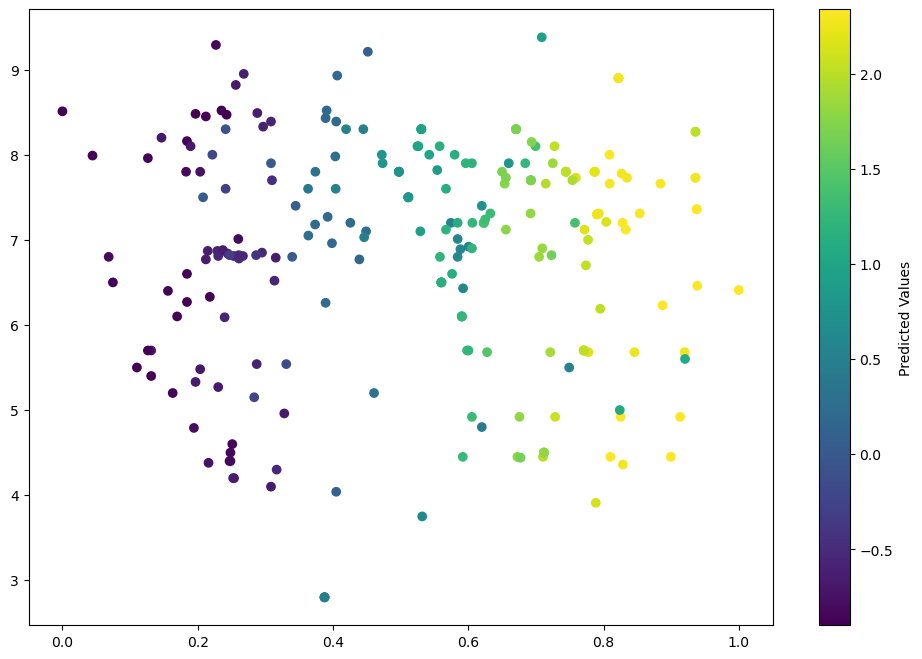

In [26]:
# 创建散点图，X轴是TotalCd，Y轴是pH，颜色映射是模型的预测值
plt.figure(figsize=(12, 8))
predicted_values = model.predict(x1)
scatter = plt.scatter(x1['TotalCd'], x1['pH'], c=predicted_values, cmap='viridis')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Values')

# 计算Light SHAP值的绝对值
explainer = shap.KernelExplainer(model.predict, x1)
shap_values = explainer.shap_values(x1)
shap_abs_values = np.abs(shap_values)

# 添加散点的Light SHAP值，颜色根据Light SHAP值设置
scatter = plt.scatter(x1['TotalCd'], x1['pH'], c=shap_abs_values, cmap='coolwarm', marker='o', edgecolors='k', s=100, alpha=0.7)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Light SHAP Values (Abs)')

# 设置X和Y轴标签
plt.xlabel('TotalCd')
plt.ylabel('pH')

# 显示图
plt.show()


In [21]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x2, y2_log, test_size=0.2, random_state=i)

    # 定义模型
    model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5, reg_lambda=5)
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('xgb_y2.csv')

In [22]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x3, y3_log, test_size=0.2, random_state=i)

    # 定义模型
    model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5, reg_lambda=5)
    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('xgb_y3.csv')

# CAT

In [27]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x1, y1_log, test_size=0.2, random_state=i)

    # 定义模型
    model = cb.CatBoostRegressor(verbose=False)

    # 设置L1正则化强度
    l1_reg_strength = 0.5

    # 在每次迭代中，随机选择一部分特征，同时使用L1和L2正则化
    model.set_params(bootstrap_type='Bernoulli', subsample=0.8, max_depth=6, 
                        rsm=0.8, reg_lambda=l1_reg_strength, random_strength=l1_reg_strength)

    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('cat_y1.csv')

In [28]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x2, y2_log, test_size=0.2, random_state=i)

    # 定义模型
    model = cb.CatBoostRegressor(verbose=False)

    # 设置L1正则化强度
    l1_reg_strength = 0.5

    # 在每次迭代中，随机选择一部分特征，同时使用L1和L2正则化
    model.set_params(bootstrap_type='Bernoulli', subsample=0.8, max_depth=6, 
                        rsm=0.8, reg_lambda=l1_reg_strength, random_strength=l1_reg_strength)


    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('cat_y2.csv')

In [29]:
cv_list = []
r2_train_list = []
rmse_train_list = []
r2_test_list = []
rmse_test_list = []
seed = []

# 初始化指标DataFrame
metrics_df = pd.DataFrame()

for i in range(100):
    # 数据集准备
    X_train, X_test, y_train, y_test = train_test_split(x3, y3_log, test_size=0.2, random_state=i)

    # 定义模型
    model = cb.CatBoostRegressor(verbose=False)

    # 设置L1正则化强度
    l1_reg_strength = 0.5

    # 在每次迭代中，随机选择一部分特征，同时使用L1和L2正则化
    model.set_params(bootstrap_type='Bernoulli', subsample=0.8, max_depth=6, 
                        rsm=0.8, reg_lambda=l1_reg_strength, random_strength=l1_reg_strength)


    model.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=['r2','neg_root_mean_squared_error'])

    cv_r2 = scores.get('test_r2')
    cv_rmse = -scores.get('test_neg_root_mean_squared_error') # 注意这里取负值，因为评分函数返回的是负的RMSE

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # 计算训练集的R方、RMSE
    r2_train = model.score(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    # 计算测试集的R方、RMSE
    r2_test = model.score(X_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 将结果添加到对应的列表中
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)

    seed.append(i)

    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)


    # 将交叉验证的R方和RMSE转换为DataFrame
    cv_r2_df = pd.DataFrame(cv_r2.reshape(1, -1), columns=['cv_r2_fold_1', 'cv_r2_fold_2', 'cv_r2_fold_3', 'cv_r2_fold_4', 'cv_r2_fold_5'])
    cv_rmse_df = pd.DataFrame(cv_rmse.reshape(1, -1), columns=['cv_rmse_fold_1', 'cv_rmse_fold_2', 'cv_rmse_fold_3', 'cv_rmse_fold_4', 'cv_rmse_fold_5'])

    # 添加其他指标到当前交叉验证的DataFrame中
    current_metrics = pd.DataFrame({
        'r2_train': [r2_train],
        'rmse_train': [rmse_train],
        'r2_test': [r2_test],
        'rmse_test': [rmse_test],
        'random_state': [i],
        'cv_r2':[cv_r2.mean()],
        'cv_rmse':[cv_rmse.mean()]
    })

    # 将当前交叉验证的所有指标合并到一个DataFrame中
    current_metrics = pd.concat([current_metrics, cv_r2_df, cv_rmse_df], axis=1)

    # 将当前交叉验证的结果添加到总的指标DataFrame中
    metrics_df = metrics_df.append(current_metrics, ignore_index=True)

metrics_df.to_csv('cat_y3.csv')

# As_Cat_Imp

In [7]:
# 读取CSV文件
df = pd.read_csv('df2_fill.csv')

# 提取特征名称（列名）并将其转换为 NumPy 数组
feature_names = np.array(df.columns)

# 如果有目标列，可以将其从特征名称数组中移除
target_column = "As-Cd"

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2_log, test_size=0.2, random_state=22)
[X_train_reduced, X_test_reduced, y_train, y_test] = [X_train, X_test, y_train, y_test]

#定义模型
model = cb.CatBoostRegressor(verbose=False)

model.fit(X_train_reduced, y_train)

y_pred_train = model.predict(X_train_reduced)
y_pred_test = model.predict(X_test_reduced)

# 计算训练集的R方、RMSE、MSE
r2_train = model.score(X_train_reduced, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# 计算测试集的R方、RMSE、MSE
r2_test = model.score(X_test_reduced, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

In [50]:
r2_test

0.9391703527062565

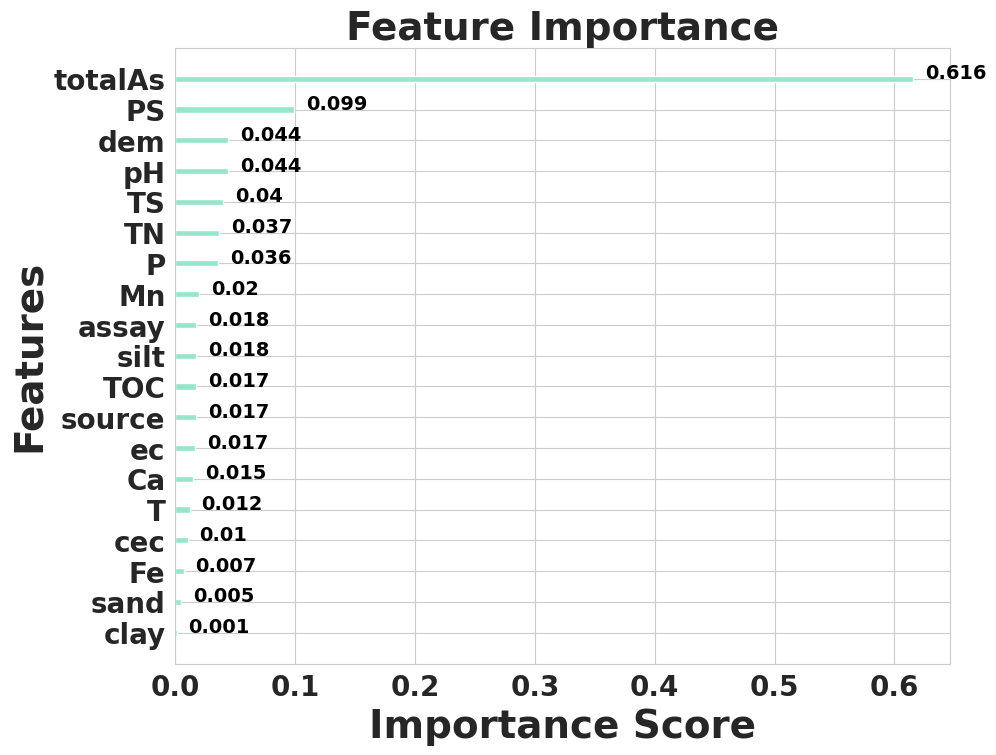

In [56]:
import catboost
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# 使用 'LossFunctionChange' 类型计算特征重要性，并传递训练数据集
importance = model.get_feature_importance(data=catboost.Pool(X_train, y_train), type='LossFunctionChange')
importance_dict = dict(zip(feature_names, importance))
importance_dict = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
feature_names, scores = zip(*importance_dict)

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(feature_names, scores, color='#95E6CC',height=0.2)
ax.invert_yaxis()  # 反转y轴以实现从上到下的降序排序
plt.ylabel('Features', fontsize=28,fontweight='bold')
plt.xlabel('Importance Score', fontsize=28,fontweight='bold')
plt.title('Feature Importance', fontsize=28,fontweight='bold')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
    tick.label.set_fontsize(20)

# 在每个条形上方添加文本标签
for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), color='black', fontsize=14, fontweight='bold')

plt.savefig('feature_importance_As_LossFunctionChange.svg', format='svg')
plt.show()


In [57]:
importance_dict

[('totalAs', 0.6158356214877498),
 ('PS', 0.09919750870940189),
 ('dem', 0.04436356620678983),
 ('pH', 0.04423105757997203),
 ('TS', 0.040182702231702866),
 ('TN', 0.03661250108986519),
 ('P', 0.035990731049814456),
 ('Mn', 0.01994852873024483),
 ('assay', 0.01762693400962649),
 ('silt', 0.017619419619473817),
 ('TOC', 0.017295007949194696),
 ('source', 0.017121388504827986),
 ('ec', 0.016579125693448535),
 ('Ca', 0.01495635776859311),
 ('T', 0.011936703106411373),
 ('cec', 0.010281022779489585),
 ('Fe', 0.006916482973633106),
 ('sand', 0.004979791869589675),
 ('clay', 0.0010598827110386566)]

In [35]:
import pandas as pd

# Given list
data = [('totalAs', 0.6158356214877498),
 ('TS', 0.09919750870940189),
 ('P', 0.04436356620678983),
 ('cec', 0.04423105757997203),
 ('sand', 0.040182702231702866),
 ('assay', 0.03661250108986519),
 ('Mn', 0.035990731049814456),
 ('TN', 0.01994852873024483),
 ('TOC', 0.01762693400962649),
 ('PS', 0.017619419619473817),
 ('silt', 0.017295007949194696),
 ('dem', 0.017121388504827986),
 ('Ca', 0.016579125693448535),
 ('clay', 0.01495635776859311),
 ('T', 0.011936703106411373),
 ('pH', 0.010281022779489585),
 ('Fe', 0.006916482973633106),
 ('source', 0.004979791869589675),
 ('ec', 0.0010598827110386566)]

# Separate the variables and values into two lists
variables = [i[0] for i in data]
values = [i[1] for i in data]

# Create a DataFrame from the two lists
df = pd.DataFrame({'Variable': variables, 'Value': values})

# Export the DataFrame as a CSV file
df.to_csv('imp_As_cat.csv', index=False)

# AS_CAT_PDP

In [36]:
from scipy.ndimage import gaussian_filter1d

In [37]:
# 读取CSV文件
df = pd.read_csv('df2_fill.csv')

# 提取特征名称（列名）并将其转换为 NumPy 数组
feature_names = np.array(df.columns)

# 如果有目标列，可以将其从特征名称数组中移除
target_column = "As-Cd)"

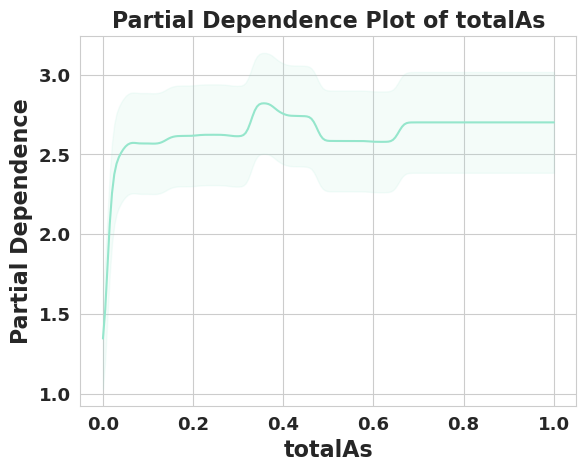

In [59]:
import catboost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# 使用 'LossFunctionChange' 类型计算特征重要性，并传递训练数据集
importance = model.get_feature_importance(data=catboost.Pool(X_train, y_train), type='LossFunctionChange')
importance_dict = dict(zip(feature_names, importance))
importance_dict = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
feature_names, scores = zip(*importance_dict)

# 选择一个特征以创建PDP图
selected_feature = 'totalAs'
selected_feature_index = list(feature_names).index(selected_feature)

# 为选定的特征创建一个网格
X_np = X_test.values
min_value = X_np[:, selected_feature_index].min()
max_value = X_np[:, selected_feature_index].max()
grid_values = np.linspace(min_value, max_value, 200)

# 计算部分依赖值
partial_dependence_values = []
for grid_value in grid_values:
    X_temp = X_np.copy()
    X_temp[:, selected_feature_index] = grid_value
    preds = model.predict(X_temp)
    pd_value = preds.mean()
    partial_dependence_values.append(pd_value)

# 使用高斯滤波器对部分依赖值进行平滑处理
smoothed_partial_dependence_values = gaussian_filter1d(partial_dependence_values, sigma=2)

# 绘制平滑后的PDP
plt.plot(grid_values, smoothed_partial_dependence_values, color="#95E6CC")
plt.fill_between(grid_values, np.array(smoothed_partial_dependence_values) - 1.96 * np.std(smoothed_partial_dependence_values),
             np.array(smoothed_partial_dependence_values) + 1.96 * np.std(smoothed_partial_dependence_values),
             alpha=0.1, color="#95E6CC")
plt.xlabel(selected_feature, size=16, fontweight='bold')
plt.ylabel('Partial Dependence', size=16, fontweight='bold')
plt.title(f'Partial Dependence Plot of {selected_feature}', size=16, fontweight='bold')
plt.xticks(fontproperties='Arial', size=13, fontweight='bold') # 设置x坐标字体和大小
plt.yticks(fontproperties='Arial', size=13, fontweight='bold') # 设置y坐标字体和大小

plt.savefig('As_totalAs.svg', format='svg')
plt.show()

In [42]:
importance_dict

[('totalAs', 0.6158356214877498),
 ('PS', 0.09919750870940189),
 ('silt', 0.04436356620678983),
 ('pH', 0.04423105757997203),
 ('source', 0.040182702231702866),
 ('clay', 0.03661250108986519),
 ('ec', 0.035990731049814456),
 ('TS', 0.01994852873024483),
 ('TN', 0.01762693400962649),
 ('T', 0.017619419619473817),
 ('Ca', 0.017295007949194696),
 ('Mn', 0.017121388504827986),
 ('Fe', 0.016579125693448535),
 ('sand', 0.01495635776859311),
 ('dem', 0.011936703106411373),
 ('cec', 0.010281022779489585),
 ('P', 0.006916482973633106),
 ('TOC', 0.004979791869589675),
 ('assay', 0.0010598827110386566)]

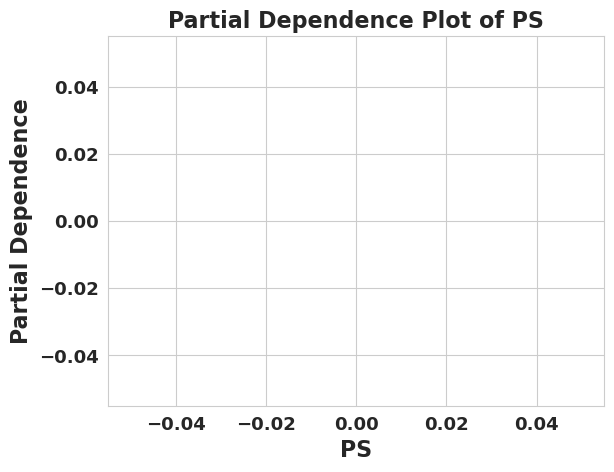

In [58]:
# 使用 'LossFunctionChange' 类型计算特征重要性，并传递训练数据集
importance = model.get_feature_importance(data=catboost.Pool(X_train, y_train), type='LossFunctionChange')
importance_dict = dict(zip(feature_names, importance))
importance_dict = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
feature_names, scores = zip(*importance_dict)

# 选择一个特征以创建PDP图
selected_feature = 'PS'
selected_feature_index = list(feature_names).index(selected_feature)

# 为选定的特征创建一个网格
X_np = X_test.values
min_value = X_np[:, selected_feature_index].min()
max_value = X_np[:, selected_feature_index].max()
grid_values = np.linspace(min_value, max_value, 200)

# 计算部分依赖值
partial_dependence_values = []
for grid_value in grid_values:
    X_temp = X_np.copy()
    X_temp[:, selected_feature_index] = grid_value
    preds = model.predict(X_temp)
    pd_value = preds.mean()
    partial_dependence_values.append(pd_value)

# 使用高斯滤波器对部分依赖值进行平滑处理
smoothed_partial_dependence_values = gaussian_filter1d(partial_dependence_values, sigma=2)

# 绘制平滑后的PDP
plt.plot(grid_values, smoothed_partial_dependence_values, color="#105210")
plt.fill_between(grid_values, np.array(smoothed_partial_dependence_values) - 1.96 * np.std(smoothed_partial_dependence_values),
             np.array(smoothed_partial_dependence_values) + 1.96 * np.std(smoothed_partial_dependence_values),
             alpha=0.1, color="#105210")
plt.xlabel(selected_feature, size=16, fontweight='bold')
plt.ylabel('Partial Dependence', size=16, fontweight='bold')
plt.title(f'Partial Dependence Plot of {selected_feature}', size=16, fontweight='bold')
plt.xticks(fontproperties='Arial', size=13, fontweight='bold') # 设置x坐标字体和大小
plt.yticks(fontproperties='Arial', size=13, fontweight='bold') # 设置y坐标字体和大小

# plt.savefig('As_PS.svg', format='svg')
plt.show()